In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 1) 데이터 로드 (필요한 칼럼만)
cols = [
    "YEAR", "SERIAL", "CPSID", "ASECFLAG", "ASECWTH",
    "PERNUM", "CPSIDP", "CPSIDV", "ASECWT",
    "AGE", "RACE", "MARST", "NCHILD", "EMPSTAT"
]
df = pd.read_csv('./data/cps_00010.csv.gz', usecols=cols)

# 2) 범주형 변수 숫자 인코딩
for cat in ["RACE", "MARST", "EMPSTAT"]:
    df[f"{cat}_code"] = pd.Categorical(df[cat]).codes

# 3) 상관관계를 볼 변수 선정
numeric_cols = [
    "YEAR", "PER                                                                                                                                                                               NUM", "ASECWTH", "ASECWT",
    "AGE", "NCHILD",
    "RACE_code", "MARST_code", "EMPSTAT_code"
]

# 4) 상관행렬 계산
corr = df[numeric_cols].corr()

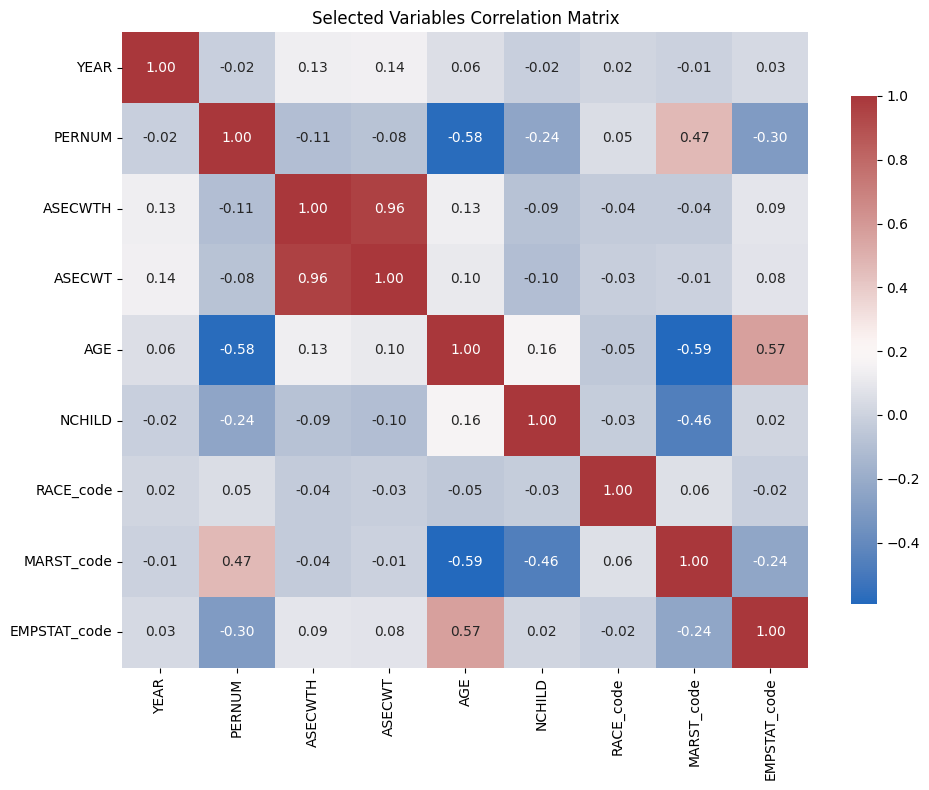

In [4]:
# 5) 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="vlag",
    cbar_kws={"shrink": .8}
)
plt.title("Selected Variables Correlation Matrix")
plt.tight_layout()
plt.show()

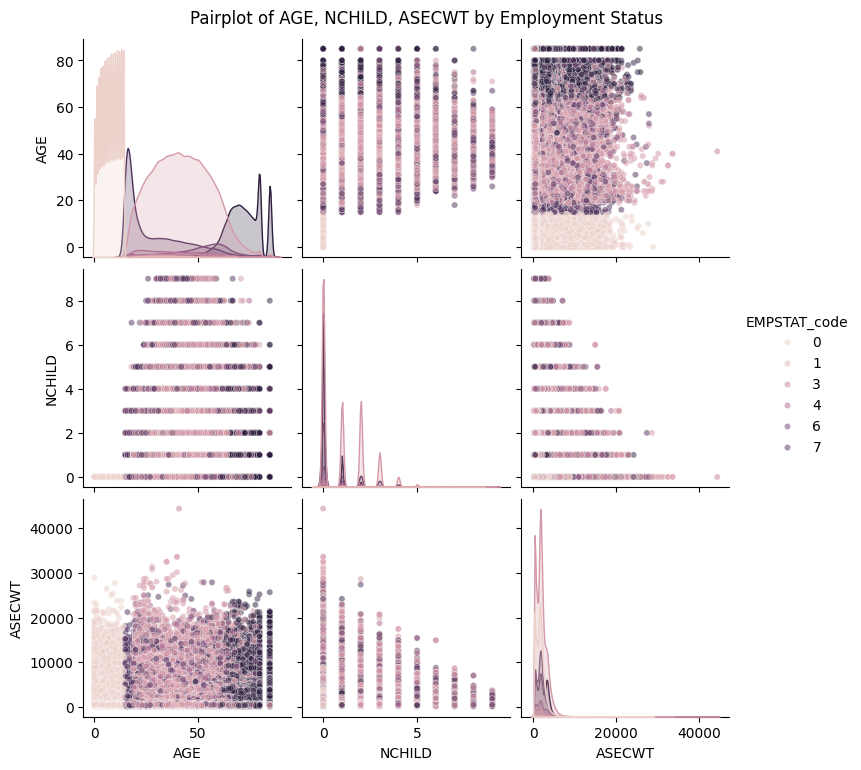

In [5]:
# 6) 페어플롯: AGE, NCHILD, ASECWT 간의 분포를 EMPSTAT_code별로 비교
sns.pairplot(
    df,
    vars=["AGE", "NCHILD", "ASECWT"],
    hue="EMPSTAT_code",
    diag_kind="kde",
    plot_kws={"alpha": 0.5, "s": 20}
)
plt.suptitle("Pairplot of AGE, NCHILD, ASECWT by Employment Status", y=1.02)
plt.show()

In [6]:
# 1) 결측치 확인
print("▶ 결측치 개수 by 컬럼")
print(df.isnull().sum(), "\n")

# 2) 기초 통계로 이상치 후보 파악
print("▶ 수치형 변수 기초 통계")
print(df[numeric_cols].describe(), "\n")

# 3) IQR 기반 이상치 탐지
print("▶ IQR 방식으로 계산한 이상치 개수")
for col in numeric_cols:
    # 결측치는 제외하고 계산
    series = df[col].dropna()
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    
    mask_outlier = (df[col] < lower) | (df[col] > upper)
    count_outliers = mask_outlier.sum()
    pct_outliers = 100 * count_outliers / len(df)
    
    print(f"{col:12s} | 이상치: {count_outliers:5d}개 ({pct_outliers:.2f}%)")

▶ 결측치 개수 by 컬럼
YEAR            0
SERIAL          0
CPSID           0
ASECFLAG        0
ASECWTH         0
PERNUM          0
CPSIDP          0
CPSIDV          0
ASECWT          0
AGE             0
RACE            0
MARST           0
NCHILD          0
EMPSTAT         0
RACE_code       0
MARST_code      0
EMPSTAT_code    0
dtype: int64 

▶ 수치형 변수 기초 통계
               YEAR        PERNUM       ASECWTH        ASECWT           AGE  \
count  2.713615e+06  2.713615e+06  2.713615e+06  2.713615e+06  2.713615e+06   
mean   2.016492e+03  2.258119e+00  1.836028e+03  1.882336e+03  3.660111e+01   
std    4.253693e+00  1.390237e+00  1.316915e+03  1.374941e+03  2.272149e+01   
min    2.010000e+03  1.000000e+00  5.251000e+01  5.017000e+01  0.000000e+00   
25%    2.013000e+03  1.000000e+00  8.959308e+02  9.080100e+02  1.600000e+01   
50%    2.016000e+03  2.000000e+00  1.665770e+03  1.684170e+03  3.600000e+01   
75%    2.020000e+03  3.000000e+00  2.387640e+03  2.477627e+03  5.400000e+01   
max    2.024000e+

C:\Users\User\AppData\Local\Temp\ipykernel_25272\2705073051.py:8: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_25272\2705073051.py:8: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_25272\2705073051.py:8: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_25272\2705073051.py:8: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_25272\2705073051.py:8: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_25272\2705073051.py:8: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaV

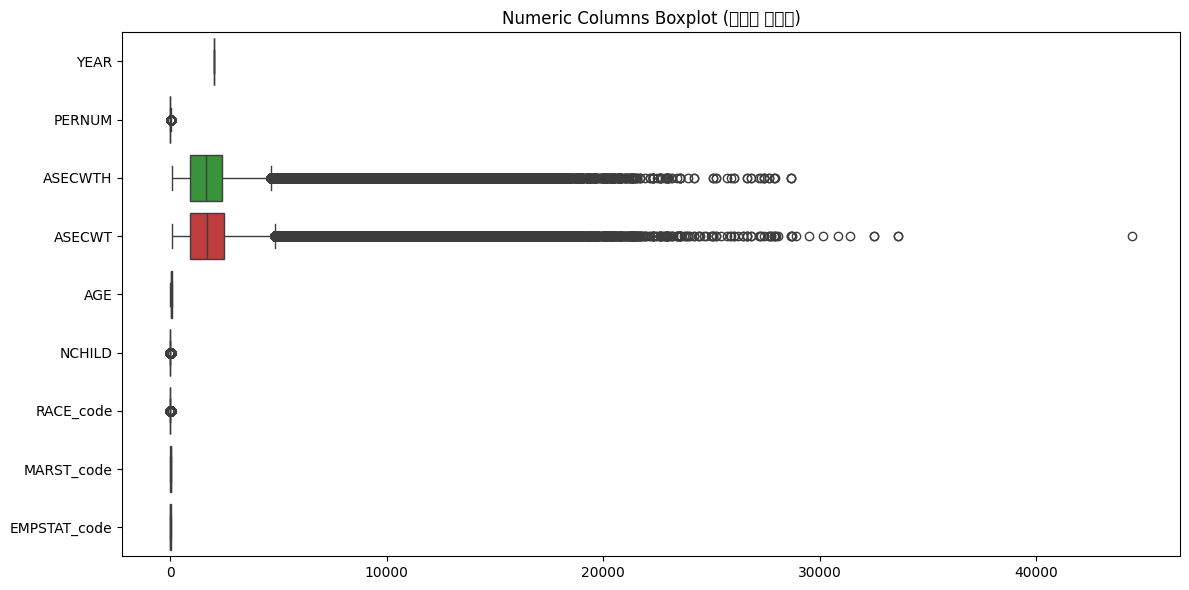

In [ ]:
# 4) 박스플롯
# plt.figure(figsize=(12, 6))
# sns.boxplot(data=df[numeric_cols], orient="h")
# plt.title("Numeric Columns Boxplot (이상치 시각화)")
# plt.tight_layout()
# plt.show()

In [ ]:
# -----------------------
# 1. IQR 방식 이상치 제거 함수
# -----------------------
def remove_outliers_iqr(df, cols):
    df_clean = df.copy()
    for col in cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# -----------------------
# 2. 이상치 제거
# -----------------------
numeric_cols = ['YEAR', 'PERNUM', 'ASECWTH', 'ASECWT', 'AGE', 
                'NCHILD', 'RACE_code', 'MARST_code', 'EMPSTAT_code']

df_clean = remove_outliers_iqr(df, numeric_cols)

# -----------------------
# 3. 박스플롯 그리기
# -----------------------
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean[numeric_cols], orient='h')
plt.title('Numeric Columns Boxplot (이상치 제거 후)')
plt.show()


KeyError: 'RACE_code'

- 나이/ RACE_code, 평균 AGE 

C:\Users\User\AppData\Local\Temp\ipykernel_44284\2112452243.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='RACE_code', y='AGE', data=df, palette='Set3')
c:\Users\User\anaconda3\envs\ml_evn\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\anaconda3\envs\ml_evn\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\anaconda3\envs\ml_evn\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


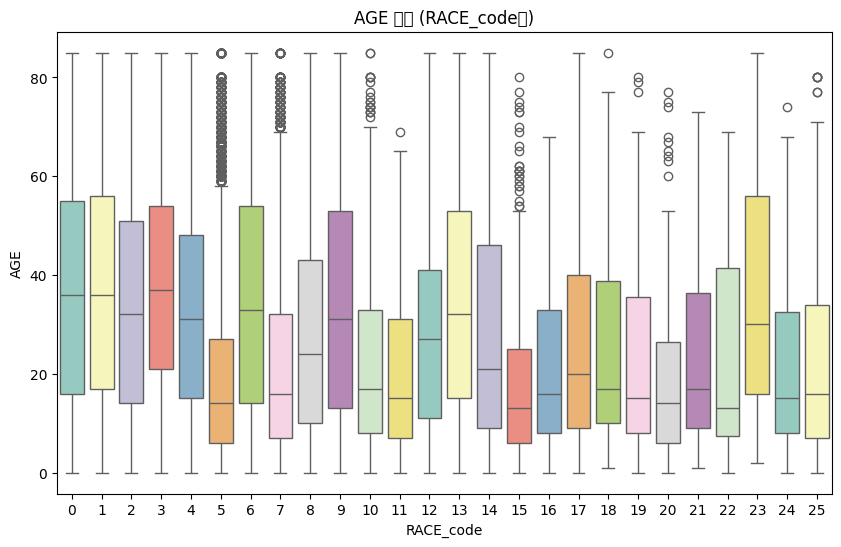

C:\Users\User\AppData\Local\Temp\ipykernel_44284\2112452243.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='RACE_code', y='AGE', data=df, estimator='mean', ci=None, palette='Set2')
C:\Users\User\AppData\Local\Temp\ipykernel_44284\2112452243.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RACE_code', y='AGE', data=df, estimator='mean', ci=None, palette='Set2')
c:\Users\User\anaconda3\envs\ml_evn\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\anaconda3\envs\ml_evn\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_fig

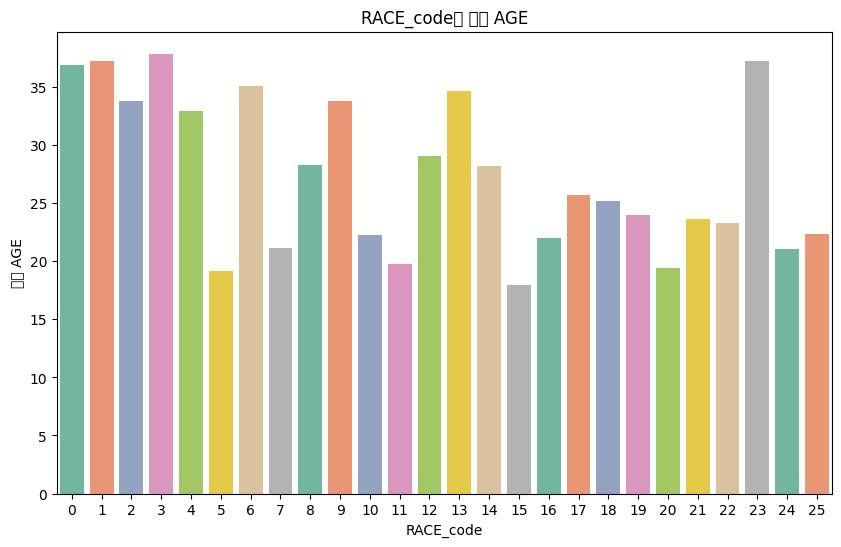

In [13]:
# 박스플롯 (AGE 분포를 RACE_code별로 비교)
plt.figure(figsize=(10, 6))
sns.boxplot(x='RACE_code', y='AGE', data=df, palette='Set3')
plt.title('AGE 분포 (RACE_code별)')
plt.xlabel('RACE_code')
plt.ylabel('AGE')
plt.show()

# 평균 AGE 비교 막대그래프
plt.figure(figsize=(10, 6))
sns.barplot(x='RACE_code', y='AGE', data=df, estimator='mean', ci=None, palette='Set2')
plt.title('RACE_code별 평균 AGE')
plt.xlabel('RACE_code')
plt.ylabel('평균 AGE')
plt.show()


In [15]:
#! pip install plotly==5.11.0

   ---------------------------------------- 0.0/15.3 MB ? eta -:--:--
   --------------------------- ------------ 10.5/15.3 MB 54.4 MB/s eta 0:00:01
   -------------------------------- ------- 12.6/15.3 MB 31.5 MB/s eta 0:00:01
   ---------------------------------------- 15.3/15.3 MB 33.2 MB/s eta 0:00:00

   -------------------- ------------------- 1/2 [plotly]
   -------------------- ------------------- 1/2 [plotly]
   -------------------- ------------------- 1/2 [plotly]
   -------------------- ------------------- 1/2 [plotly]
   -------------------- ------------------- 1/2 [plotly]
   -------------------- ------------------- 1/2 [plotly]
   -------------------- ------------------- 1/2 [plotly]
   -------------------- ------------------- 1/2 [plotly]
   -------------------- ------------------- 1/2 [plotly]
   -------------------- ------------------- 1/2 [plotly]
   -------------------- ------------------- 1/2 [plotly]
   -------------------- ------------------- 1/2 [plotly]
   -----

- 컬럼 확인

In [23]:
import pandas as pd

# 1) 파일 불러오기
df = pd.read_csv("./data/cps_00010.csv.gz", compression='gzip')

# 2) HINSEMP, HINSPUR 컬럼이 있으면만 가져오기
cols_to_get = [col for col in ['HINSEMP', 'HINSPUR'] if col in df.columns]

if cols_to_get:
    df_subset = df[cols_to_get].copy()
    print(f"가져온 컬럼: {cols_to_get}")
    print(df_subset.head())
else:
    print("데이터에 HINSEMP, HINSPUR 컬럼이 없습니다.")


데이터에 HINSEMP, HINSPUR 컬럼이 없습니다.


In [ ]:
#! pip install nbformat>=4.2.0

In [5]:
# ============================
# 민간보험 이탈률 → HTML 저장
# (PHINSUR 사용, STATEFIP 있으면 버블맵 / 없으면 연도별 막대)
# ============================

import numpy as np
if not hasattr(np, 'bool8'):
    np.bool8 = np.bool_

import pandas as pd
import plotly.express as px
import os

# 1) 데이터 로드
path = "./data/cps_00010.csv.gz"  # <- 업로드한 gz
df = pd.read_csv(path, compression="gzip", low_memory=False)

# 2) 대소문자 무시 컬럼 검색 헬퍼
cols_u = {c.upper().strip(): c for c in df.columns}
def get_col(candidates):
    for cand in candidates:
        k = cand.upper().strip()
        if k in cols_u:
            return cols_u[k]
    return None

# 3) 민간보험 보유여부: PHINSUR==1 가정
ph_col = get_col(['PHINSUR'])
if ph_col is None:
    raise KeyError("PHINSUR 컬럼을 찾지 못했습니다. (현재 데이터 기준 민간보험 여부를 만들 수 없음)")

df['private_any'] = pd.to_numeric(df[ph_col], errors='coerce') == 1

# 4) 가중치 자동 탐색 (없으면 균등)
wt_col = get_col(['ASECWT','ASECWTH','WTFINL','HWTFINL'])
if wt_col is None:
    df['_w'] = 1.0
    wt_col = '_w'
else:
    df[wt_col] = pd.to_numeric(df[wt_col], errors='coerce').fillna(0.0)

# 5) 패널 매칭(전년→당해) 필수: CPSIDP, YEAR
id_col = get_col(['CPSIDP'])
yr_col = get_col(['YEAR'])
if id_col is None or yr_col is None:
    raise KeyError("CPSIDP 또는 YEAR가 없어 이탈률 계산이 불가합니다.")

df[yr_col] = pd.to_numeric(df[yr_col], errors='coerce')

# 6) 주 정보 유무 확인
statefip_col = get_col(['STATEFIP'])

# 7) 전년도→당해 매칭으로 이탈 여부 계산
base_cols = [id_col, yr_col, 'private_any', wt_col]
if statefip_col:
    base_cols.append(statefip_col)

base = df[base_cols].dropna(subset=[id_col, yr_col]).copy()
prev = base.rename(columns={yr_col:'YEAR_prev', 'private_any':'private_prev'})
cur  = base.rename(columns={'private_any':'private_cur'})

merged = pd.merge(cur, prev[[id_col, 'YEAR_prev', 'private_prev']], on=id_col, how='inner')
merged = merged[merged['YEAR_prev'] == merged[yr_col] - 1]
merged['lost_private'] = (merged['private_prev'] == True) & (merged['private_cur'] == False)

# 8) 시각화 → HTML로 저장 (렌더러 불필요)
save_dir = "./data"
os.makedirs(save_dir, exist_ok=True)

if statefip_col:
    # 주 약어 매핑 후 버블맵
    fip2abbr = {
        1:'AL',2:'AK',4:'AZ',5:'AR',6:'CA',8:'CO',9:'CT',10:'DE',11:'DC',12:'FL',13:'GA',
        15:'HI',16:'ID',17:'IL',18:'IN',19:'IA',20:'KS',21:'KY',22:'LA',23:'ME',24:'MD',
        25:'MA',26:'MI',27:'MN',28:'MS',29:'MO',30:'MT',31:'NE',32:'NV',33:'NH',34:'NJ',
        35:'NM',36:'NY',37:'NC',38:'ND',39:'OH',40:'OK',41:'OR',42:'PA',44:'RI',45:'SC',
        46:'SD',47:'TN',48:'TX',49:'UT',50:'VT',51:'VA',53:'WA',54:'WV',55:'WI',56:'WY'
    }
    merged[statefip_col] = pd.to_numeric(merged[statefip_col], errors='coerce')
    merged['state_abbr'] = merged[statefip_col].map(fip2abbr)

    agg = (
        merged.dropna(subset=['state_abbr'])
              .groupby('state_abbr', as_index=False)
              .apply(lambda g: pd.Series({
                  'weighted_lost': (g[wt_col]*g['lost_private'].astype(float)).sum(),
                  'weighted_total': g[wt_col].sum()
              }))
    )
    agg['churn_rate'] = agg['weighted_lost']/agg['weighted_total']
    agg['bubble_size'] = agg['weighted_total']/1e5

    fig = px.scatter_geo(
        agg, locations='state_abbr', locationmode='USA-states',
        size='bubble_size', color='churn_rate',
        hover_name='state_abbr',
        hover_data={'churn_rate':':.2%','bubble_size':False,'state_abbr':False},
        scope='usa',
        title='주별 민간보험 이탈률 (PHINSUR 기준, 가중치 적용)'
    )
    out_html = os.path.join(save_dir, "private_insurance_churn_bubblemap.html")
    fig.write_html(out_html, include_plotlyjs='cdn')
    print(f"[저장] 주별 버블맵 HTML → {out_html}")

else:
    # 주 정보 없음 → 연도별 이탈률 막대그래프
    yearly = (
        merged.groupby(yr_col, as_index=False)
              .apply(lambda g: pd.Series({
                  'churn_rate': (g[wt_col]*g['lost_private'].astype(float)).sum() / g[wt_col].sum()
              }))
    )
    fig = px.bar(
        yearly, x=yr_col, y='churn_rate',
        text=yearly['churn_rate'].map(lambda x: f"{x:.2%}"),
        title='연도별 민간보험 이탈률 (PHINSUR 기준, 가중치 적용)',
        labels={'churn_rate':'이탈률','YEAR':'년도'}
    )
    fig.update_traces(textposition='outside')
    out_html = os.path.join(save_dir, "private_insurance_churn_yearly.html")
    fig.write_html(out_html, include_plotlyjs='cdn')
    print(f"[저장] 연도별 이탈률 HTML → {out_html}")


C:\Users\Playdata\AppData\Local\Temp\ipykernel_23124\3143604103.py:109: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: pd.Series({


[저장] 연도별 이탈률 HTML → ./data\private_insurance_churn_yearly.html


In [6]:
import os
import numpy as np
import pandas as pd
import plotly.express as px

# (옵션) NumPy bool8 호환
if not hasattr(np, 'bool8'):
    np.bool8 = np.bool_

# 0) 경로/출력 폴더
path = "./data/cps_00010.csv.gz"
save_dir = "./output"
os.makedirs(save_dir, exist_ok=True)

# 1) 로드
df = pd.read_csv(path, compression="gzip", low_memory=False)

# 2) 컬럼명 매핑 함수
cols_u = {c.upper().strip(): c for c in df.columns}
def get_col(candidates):
    for cand in candidates:
        key = cand.upper().strip()
        if key in cols_u:
            return cols_u[key]
    return None

# 3) 필수 컬럼 찾기
ph_col   = get_col(['PHINSUR'])
year_col = get_col(['YEAR'])
wt_col   = get_col(['ASECWT','ASECWTH','WTFINL','HWTFINL'])

if ph_col is None:
    raise KeyError("PHINSUR 컬럼을 찾지 못했습니다.")
if year_col is None:
    raise KeyError("YEAR 컬럼을 찾지 못했습니다.")

# 4) 민간보험 여부 / 가중치
df['private_any'] = pd.to_numeric(df[ph_col], errors='coerce') == 1

if wt_col is None:
    df['_w'] = 1.0
    wt_col = '_w'
else:
    df[wt_col] = pd.to_numeric(df[wt_col], errors='coerce').fillna(0.0)

df[year_col] = pd.to_numeric(df[year_col], errors='coerce')

# 5) 연도별 보유율 (pandas 경고 방지: include_groups=False)
yearly = (
    df.dropna(subset=[year_col])
      .groupby(year_col, as_index=False)
      .apply(lambda g: pd.Series({
          'coverage_rate': (g[wt_col] * g['private_any'].astype(float)).sum() / g[wt_col].sum()
      }), include_groups=False)
    .sort_values(by=year_col)
)

# 6) 라인 그래프 생성 (텍스트 라벨 포함)
fig = px.line(
    yearly, x=year_col, y='coverage_rate',
    markers=True,
    title="연도별 민간보험 보유율 (PHINSUR 기준)",
    labels={'coverage_rate':'보유율', year_col:'년도'}
)
# 라벨을 선 위에 표시 (라인차트에서는 textposition 대신 text 사용)
fig.update_traces(text=yearly['coverage_rate'].map(lambda x: f"{x:.2%}"), mode='lines+markers+text')
fig.update_traces(textposition='top center')

# 7) HTML 저장 (MIME 렌더링 없이 확인 가능)
output_path = os.path.join(save_dir, "private_insurance_by_rate.html")
fig.write_html(output_path, include_plotlyjs='cdn')

print(f"HTML 저장 완료: {output_path}")
# fig.show()  # 현재 환경에서는 렌더링 에러가 나니 사용하지 않습니다.


HTML 저장 완료: ./output\private_insurance_by_rate.html


In [7]:
import os
save_dir = "./data"
os.makedirs(save_dir, exist_ok=True)

# 1) 파일 로드
path = "./data/cps_00010.csv.gz"
df = pd.read_csv(path, compression="gzip", low_memory=False)

# 2) 컬럼 탐색 함수
cols_u = {c.upper().strip(): c for c in df.columns}
def get_col(candidates):
    for cand in candidates:
        if cand.upper().strip() in cols_u:
            return cols_u[cand.upper().strip()]
    return None

# 3) PHINSUR → 민간보험 여부
ph_col = get_col(['PHINSUR'])
df['private_any'] = pd.to_numeric(df[ph_col], errors='coerce') == 1

# 4) 가중치 컬럼
wt_col = get_col(['ASECWT','ASECWTH','WTFINL','HWTFINL'])
if wt_col is None:
    df['_w'] = 1.0
    wt_col = '_w'
else:
    df[wt_col] = pd.to_numeric(df[wt_col], errors='coerce').fillna(0.0)

# 5) AGE 컬럼
age_col = get_col(['AGE'])
df[age_col] = pd.to_numeric(df[age_col], errors='coerce')

# 6) 연령대 구간 만들기
bins = [0, 17, 29, 39, 49, 59, 69, 79, 120]
labels = ['0-17', '18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']
df['age_group'] = pd.cut(df[age_col], bins=bins, labels=labels, right=True)

# 7) 연령대별 민간보험 보유율 계산
age_grouped = (
    df.dropna(subset=['age_group'])
      .groupby('age_group', as_index=False)
      .apply(lambda g: pd.Series({
          'coverage_rate': (g[wt_col] * g['private_any'].astype(float)).sum() / g[wt_col].sum()
      }), include_groups=False)  # pandas 경고 방지
)

# 8) 시각화
fig = px.bar(
    age_grouped,
    x='age_group', y='coverage_rate',
    text=age_grouped['coverage_rate'].map(lambda x: f"{x:.1%}"),
    title='연령대별 민간보험 보유율 (PHINSUR 기준)',
    labels={'age_group':'연령대','coverage_rate':'보유율'}
)
fig.update_traces(textposition='outside')

# HTML 파일 저장
output_path = os.path.join(save_dir, "private_insurance_by_age.html")
fig.write_html(output_path, include_plotlyjs='cdn')

print(f"그래프가 HTML 파일로 저장되었습니다: {output_path}")
print("이 파일을 다운로드 후 브라우저에서 열면 인터랙티브하게 볼 수 있습니다.")

C:\Users\Playdata\AppData\Local\Temp\ipykernel_23124\3546153150.py:41: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



그래프가 HTML 파일로 저장되었습니다: ./data\private_insurance_by_age.html
이 파일을 다운로드 후 브라우저에서 열면 인터랙티브하게 볼 수 있습니다.


In [39]:
# (옵션) NumPy bool8 호환
if not hasattr(np, 'bool8'):
    np.bool8 = np.bool_

# 1) 데이터 로드
path = "./data/cps_00010.csv.gz"
df = pd.read_csv(path, compression="gzip", low_memory=False)

# 2) 컬럼 탐색 함수 (대소문자/공백 무시)
cols_u = {c.upper().strip(): c for c in df.columns}
def get_col(candidates):
    for cand in candidates:
        key = cand.upper().strip()
        if key in cols_u:
            return cols_u[key]
    return None

# 3) PHINSUR → 민간보험 여부 (1=True 가정)
ph_col = get_col(['PHINSUR'])
if ph_col is None:
    raise KeyError("PHINSUR 컬럼을 찾지 못했습니다. (민간보험 여부 생성 불가)")

df['private_any'] = pd.to_numeric(df[ph_col], errors='coerce') == 1

# 4) 가중치 자동 선택 (없으면 균등가중치)
wt_col = get_col(['ASECWT','ASECWTH','WTFINL','HWTFINL'])
if wt_col is None:
    df['_w'] = 1.0
    wt_col = '_w'
else:
    df[wt_col] = pd.to_numeric(df[wt_col], errors='coerce').fillna(0.0)

# 5) 연도 컬럼
year_col = get_col(['YEAR'])
if year_col is None:
    raise KeyError("YEAR 컬럼을 찾지 못했습니다.")
df[year_col] = pd.to_numeric(df[year_col], errors='coerce')

# 6) 연령대 그룹 만들기
age_col = get_col(['AGE'])
if age_col is None:
    raise KeyError("AGE 컬럼을 찾지 못했습니다.")
df[age_col] = pd.to_numeric(df[age_col], errors='coerce')

bins = [0, 17, 29, 39, 49, 59, 69, 79, 120]
labels = ['0-17', '18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']
df['age_group'] = pd.cut(df[age_col], bins=bins, labels=labels, right=True)

# 7) 연도별 민간보험 "보유율" (가중치 적용)
yearly = (
    df.dropna(subset=[year_col])
      .groupby(year_col, as_index=False)
      .apply(lambda g: pd.Series({
          'coverage_rate': (g[wt_col] * g['private_any'].astype(float)).sum() / g[wt_col].sum()
      }), include_groups=False)  # pandas 경고 방지
)

# 8) 연령대별 민간보험 "보유율" (가중치 적용)
age_grouped = (
    df.dropna(subset=['age_group'])
      .groupby('age_group', as_index=False)
      .apply(lambda g: pd.Series({
          'coverage_rate': (g[wt_col] * g['private_any'].astype(float)).sum() / g[wt_col].sum()
      }), include_groups=False)
)

# 9) HTML로 저장 (브라우저에서 열어보기)
save_dir = "/mnt/data"
os.makedirs(save_dir, exist_ok=True)

# 연도별 라인 차트
fig1 = px.line(
    yearly, x=year_col, y='coverage_rate', markers=True,
    title="연도별 민간보험 보유율 (PHINSUR 기준, 가중치 적용)",
    labels={year_col:'년도', 'coverage_rate':'보유율'}
)
fig1.update_traces(text=yearly['coverage_rate'].map(lambda x: f"{x:.2%}"))
out1 = os.path.join(save_dir, "private_insurance_coverage_yearly.html")
fig1.write_html(out1, include_plotlyjs='cdn')

# 연령대별 막대 차트
fig2 = px.bar(
    age_grouped, x='age_group', y='coverage_rate',
    text=age_grouped['coverage_rate'].map(lambda x: f"{x:.1%}"),
    title="연령대별 민간보험 보유율 (PHINSUR 기준, 가중치 적용)",
    labels={'age_group':'연령대', 'coverage_rate':'보유율'}
)
fig2.update_traces(textposition='outside')
out2 = os.path.join(save_dir, "private_insurance_coverage_by_age.html")
fig2.write_html(out2, include_plotlyjs='cdn')

print("HTML 저장 완료:")
print(out1)
print(out2)


C:\Users\User\AppData\Local\Temp\ipykernel_44284\762562196.py:61: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



HTML 저장 완료:
/mnt/data\private_insurance_coverage_yearly.html
/mnt/data\private_insurance_coverage_by_age.html


In [8]:
# 연령별 민간보험 이탈률 (HTML 저장)

import os
import numpy as np
import pandas as pd
import plotly.express as px

# NumPy 2.0 호환 패치
if not hasattr(np, 'bool8'):
    np.bool8 = np.bool_

# 1) 데이터 로드
path = "./data/cps_00010.csv.gz"   # 데이터 경로
df = pd.read_csv(path, compression="gzip", low_memory=False)

# 2) 컬럼 매핑 헬퍼 (대소문자/공백 무시)
cols_u = {c.upper().strip(): c for c in df.columns}
def get_col(cands):
    for c in cands:
        k = c.upper().strip()
        if k in cols_u:
            return cols_u[k]
    return None

# 3) 필요한 컬럼 확인/준비
ph_col   = get_col(['PHINSUR'])
id_col   = get_col(['CPSIDP'])
yr_col   = get_col(['YEAR'])
age_col  = get_col(['AGE'])
wt_col   = get_col(['ASECWT','ASECWTH','WTFINL','HWTFINL'])

if ph_col is None:  raise KeyError("PHINSUR 컬럼이 필요합니다.")
if id_col is None:  raise KeyError("CPSIDP 컬럼이 필요합니다.")
if yr_col is None:  raise KeyError("YEAR 컬럼이 필요합니다.")
if age_col is None: raise KeyError("AGE 컬럼이 필요합니다.")

# 4) 형 변환
df[yr_col]  = pd.to_numeric(df[yr_col], errors='coerce')
df[age_col] = pd.to_numeric(df[age_col], errors='coerce')
df['private_any'] = pd.to_numeric(df[ph_col], errors='coerce') == 1

if wt_col is None:
    df['_w'] = 1.0
    wt_col = '_w'
else:
    df[wt_col] = pd.to_numeric(df[wt_col], errors='coerce').fillna(0.0)

# 5) 전년도-당해년도 매칭
base = df[[id_col, yr_col, age_col, 'private_any', wt_col]].dropna(subset=[id_col, yr_col, age_col]).copy()
prev = base.rename(columns={yr_col:'YEAR_prev', age_col:'AGE_prev', 'private_any':'private_prev'})
cur  = base.rename(columns={'private_any':'private_cur'})

merged = pd.merge(cur, prev[[id_col, 'YEAR_prev', 'private_prev']], on=id_col, how='inner')
merged = merged[merged['YEAR_prev'] == merged[yr_col] - 1]

# 6) 이탈 여부 (전년 True → 금년 False)
merged['lost_private'] = (merged['private_prev'] == True) & (merged['private_cur'] == False)
merged['lost_private_float'] = merged['lost_private'].astype(float)

# 7) 현재년도 나이를 기준으로 연령대 생성
bins   = [0, 17, 29, 39, 49, 59, 69, 79, 200]
labels = ['0-17','18-29','30-39','40-49','50-59','60-69','70-79','80+']
merged['age_group'] = pd.cut(merged[age_col], bins=bins, labels=labels, right=True)

# 8) 연령대별 가중 이탈률 집계 (경고 없는 방식)
agg = (
    merged.dropna(subset=['age_group'])
          .assign(num=lambda g: g[wt_col] * g['lost_private_float'],
                  den=lambda g: g[wt_col])
          .groupby('age_group', as_index=False)[['num','den']].sum()
)
agg['churn_rate'] = agg['num'] / agg['den']

# 9) HTML 저장 (막대 그래프)
save_dir = "./output"
os.makedirs(save_dir, exist_ok=True)

fig = px.bar(
    agg, x='age_group', y='churn_rate',
    text=agg['churn_rate'].map(lambda x: f"{x:.2%}"),
    title='연령대별 민간보험 이탈률 (PHINSUR 기준, 전년→당해, 가중치 적용)',
    labels={'age_group':'연령대', 'churn_rate':'이탈률'}
)
fig.update_traces(textposition='outside')
out_html = os.path.join(save_dir, "private_insurance_churn_by_age.html")
fig.write_html(out_html, include_plotlyjs='cdn')

print(f"[저장 완료] {out_html}")


[저장 완료] ./output\private_insurance_churn_by_age.html


C:\Users\Playdata\AppData\Local\Temp\ipykernel_23124\1480947396.py:70: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [14]:
# ==============================
# Medicaid(CAIDLY) & 군보험(HICHAMP)
# 연령대별 보유율 & 이탈률 계산 + HTML 저장
# ==============================

import os
import numpy as np
import pandas as pd
import plotly.express as px

# NumPy 2.0 호환 패치
if not hasattr(np, 'bool8'):
    np.bool8 = np.bool_

# 1) 데이터 로드
path = "./data/cps_00010.csv.gz"
df = pd.read_csv(path, compression="gzip", low_memory=False)

# 2) 컬럼 찾기
cols_u = {c.upper().strip(): c for c in df.columns}
def get_col(cands):
    for c in cands:
        key = c.upper().strip()
        if key in cols_u:
            return cols_u[key]
    return None

id_col  = get_col(['CPSIDP'])
yr_col  = get_col(['YEAR'])
age_col = get_col(['AGE'])
wt_col  = get_col(['ASECWT','ASECWTH','WTFINL','HWTFINL'])
caid_col = get_col(['CAIDLY'])
champ_col = get_col(['HICHAMP'])

if id_col is None:  raise KeyError("CPSIDP 컬럼 필요")
if yr_col is None:  raise KeyError("YEAR 컬럼 필요")
if age_col is None: raise KeyError("AGE 컬럼 필요")
if caid_col is None and champ_col is None:
    raise KeyError("CAIDLY 또는 HICHAMP 컬럼이 없음")

# 3) 형 변환
df[yr_col] = pd.to_numeric(df[yr_col], errors='coerce')
df[age_col] = pd.to_numeric(df[age_col], errors='coerce')
if wt_col is None:
    df['_w'] = 1.0
    wt_col = '_w'
else:
    df[wt_col] = pd.to_numeric(df[wt_col], errors='coerce').fillna(0.0)

# 4) 연령대 구간
bins = [0, 17, 29, 39, 49, 59, 69, 79, 200]
labels = ['0-17','18-29','30-39','40-49','50-59','60-69','70-79','80+']
df['age_group'] = pd.cut(df[age_col], bins=bins, labels=labels, right=True)

# 5) 분석 함수
def calc_and_plot(ins_col, ins_name):
    """보험 컬럼(ins_col) 기준 연령대별 보유율/이탈률 계산 & HTML 저장"""
    # 보험 여부
    df['ins_flag'] = pd.to_numeric(df[ins_col], errors='coerce') == 1

    # 보유율
    cov_df = df.dropna(subset=['age_group'])[['age_group', wt_col, 'ins_flag']].copy()
    cov_df['num'] = cov_df[wt_col] * cov_df['ins_flag'].astype(float)
    cov_df['den'] = cov_df[wt_col]
    coverage = cov_df.groupby('age_group', as_index=False)[['num','den']].sum()
    coverage['coverage_rate'] = coverage['num'] / coverage['den']

    # 이탈률 (전년→당해)
    base = df[[id_col, yr_col, 'age_group', 'ins_flag', wt_col]].dropna(
        subset=[id_col, yr_col, 'age_group']
    ).copy()
    prev = base.rename(columns={yr_col: 'YEAR_prev', 'ins_flag': 'prev_flag'})
    cur  = base.rename(columns={'ins_flag': 'cur_flag'})
    merged = pd.merge(cur, prev[[id_col, 'YEAR_prev', 'prev_flag']], on=id_col, how='inner')
    merged = merged[merged['YEAR_prev'] == merged[yr_col] - 1]
    merged['lost'] = (merged['prev_flag'] == True) & (merged['cur_flag'] == False)

    ch_df = merged[['age_group', wt_col, 'lost']].copy()
    ch_df['num'] = ch_df[wt_col] * ch_df['lost'].astype(float)
    ch_df['den'] = ch_df[wt_col]
    churn = ch_df.groupby('age_group', as_index=False)[['num','den']].sum()
    churn['churn_rate'] = churn['num'] / churn['den']

    # 저장 경로
    save_dir = "./output"
    os.makedirs(save_dir, exist_ok=True)

    # 보유율 그래프
    fig_cov = px.bar(
        coverage, x='age_group', y='coverage_rate',
        text=coverage['coverage_rate'].map(lambda x: f"{x:.1%}"),
        title=f'연령대별 {ins_name} 보유율',
        labels={'age_group':'연령대','coverage_rate':'보유율'}
    )
    fig_cov.update_traces(textposition='outside')
    cov_path = os.path.join(save_dir, f"{ins_name.lower()}_coverage_by_age.html")
    fig_cov.write_html(cov_path, include_plotlyjs='cdn')

    # 이탈률 그래프
    fig_churn = px.bar(
        churn, x='age_group', y='churn_rate',
        text=churn['churn_rate'].map(lambda x: f"{x:.1%}"),
        title=f'연령대별 {ins_name} 이탈률 (전년→당해)',
        labels={'age_group':'연령대','churn_rate':'이탈률'}
    )
    fig_churn.update_traces(textposition='outside')
    churn_path = os.path.join(save_dir, f"{ins_name.lower()}_churn_by_age.html")
    fig_churn.write_html(churn_path, include_plotlyjs='cdn')

    return cov_path, churn_path

# 6) Medicaid(CAIDLY)
paths_caid = None
if caid_col:
    paths_caid = calc_and_plot(caid_col, "Medicaid")

# 7) 군 관련 보험(HICHAMP)
paths_champ = None
if champ_col:
    paths_champ = calc_and_plot(champ_col, "군보험(HICHAMP)")

print("[저장 완료]")
print("Medicaid:", paths_caid)
print("군보험:", paths_champ)


C:\Users\Playdata\AppData\Local\Temp\ipykernel_23124\2364759222.py:65: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Playdata\AppData\Local\Temp\ipykernel_23124\2364759222.py:81: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Playdata\AppData\Local\Temp\ipykernel_23124\2364759222.py:65: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



[저장 완료]
Medicaid: ('./output\\medicaid_coverage_by_age.html', './output\\medicaid_churn_by_age.html')
군보험: ('./output\\군보험(hichamp)_coverage_by_age.html', './output\\군보험(hichamp)_churn_by_age.html')


C:\Users\Playdata\AppData\Local\Temp\ipykernel_23124\2364759222.py:81: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [16]:
# ============================================
# Medicaid(CAIDLY) & HICHAMP 비교:
# 연령대별 보유율 / 이탈률 (가중치 적용) → HTML 저장
# 파일 경로: /mnt/data/cps_00010.csv.gz
# ============================================

import os
import numpy as np
import pandas as pd
import plotly.express as px

# NumPy 2.0 호환 패치
if not hasattr(np, 'bool8'):
    np.bool8 = np.bool_

# 1) 데이터 로드
path = "./data/cps_00010.csv.gz"
df = pd.read_csv(path, compression="gzip", low_memory=False)

# 2) 유틸: 컬럼 찾기(대소문자/공백 무시)
cols_u = {c.upper().strip(): c for c in df.columns}
def get_col(cands):
    for c in cands:
        k = c.upper().strip()
        if k in cols_u:
            return cols_u[k]
    return None

id_col   = get_col(['CPSIDP'])
yr_col   = get_col(['YEAR'])
age_col  = get_col(['AGE'])
wt_col   = get_col(['ASECWT','ASECWTH','WTFINL','HWTFINL'])
caid_col = get_col(['CAIDLY'])     # Medicaid proxy in your file
champ_col= get_col(['HICHAMP'])    # CHAMP/TRICARE

# 필수 기본 컬럼 체크
for name, col in [('CPSIDP', id_col), ('YEAR', yr_col), ('AGE', age_col)]:
    if col is None:
        raise KeyError(f"{name} 컬럼이 필요합니다.")

if (caid_col is None) and (champ_col is None):
    raise KeyError("CAIDLY 또는 HICHAMP 중 최소 하나가 필요합니다.")

# 3) 형 변환 & 가중치
df[yr_col]  = pd.to_numeric(df[yr_col], errors='coerce')
df[age_col] = pd.to_numeric(df[age_col], errors='coerce')
if wt_col is None:
    df['_w'] = 1.0
    wt_col = '_w'
else:
    df[wt_col] = pd.to_numeric(df[wt_col], errors='coerce').fillna(0.0)

# 4) 연령대 구간
bins = [0, 17, 29, 39, 49, 59, 69, 79, 200]
labels = ['0-17','18-29','30-39','40-49','50-59','60-69','70-79','80+']
df['age_group'] = pd.cut(df[age_col], bins=bins, labels=labels, right=True)

# 5) 보험 플래그 생성 함수
def insurance_flag(series, name):
    s = pd.to_numeric(series, errors='coerce')
    return (s == 1).rename(name)

flags = []
ins_order = []  # 실제 존재하는 보험만 사용
if caid_col is not None:
    flags.append(insurance_flag(df[caid_col], 'Medicaid'))
    ins_order.append('Medicaid')
if champ_col is not None:
    flags.append(insurance_flag(df[champ_col], 'HICHAMP'))
    ins_order.append('HICHAMP')

# 6) 연령대별 "보유율" (가중치) — 두 보험을 세로로 이어붙여 비교용 long 형태 생성
cov_rows = []
for name, col in [('Medicaid', 'Medicaid'), ('HICHAMP', 'HICHAMP')]:
    if name not in ins_order:
        continue
    flag = flags[ins_order.index(name)]
    tmp = pd.DataFrame({
        'age_group': df['age_group'],
        'wt': df[wt_col],
        'flag': flag
    }).dropna(subset=['age_group'])
    tmp['num'] = tmp['wt'] * tmp['flag'].astype(float)
    tmp['den'] = tmp['wt']
    cov = tmp.groupby('age_group', as_index=False)[['num','den']].sum()
    cov['coverage_rate'] = cov['num'] / cov['den']
    cov['insurance_type'] = name
    cov_rows.append(cov[['age_group','insurance_type','coverage_rate']])

coverage_long = pd.concat(cov_rows, ignore_index=True) if cov_rows else pd.DataFrame()

# 7) "이탈률" (전년→당해, 가중치) — 보험별로 따로 계산 후 결합
churn_rows = []
base = df[[id_col, yr_col, 'age_group', wt_col]].dropna(subset=[id_col, yr_col, 'age_group']).copy()

for name, ser in [('Medicaid', caid_col), ('HICHAMP', champ_col)]:
    if ser is None:  # 해당 보험 없음
        continue
    flag_cur = pd.to_numeric(df[ser], errors='coerce') == 1
    # base와 align
    b = base.copy()
    b['flag'] = flag_cur
    prev = b.rename(columns={yr_col: 'YEAR_prev', 'flag': 'flag_prev'})
    cur  = b.rename(columns={'flag': 'flag_cur'})
    merged = pd.merge(cur, prev[[id_col, 'YEAR_prev', 'flag_prev']], on=id_col, how='inner')
    merged = merged[merged['YEAR_prev'] == merged[yr_col] - 1]
    merged['lost'] = (merged['flag_prev'] == True) & (merged['flag_cur'] == False)
    x = merged[['age_group', wt_col, 'lost']].copy()
    x['num'] = x[wt_col] * x['lost'].astype(float)
    x['den'] = x[wt_col]
    churn = x.groupby('age_group', as_index=False)[['num','den']].sum()
    churn['churn_rate'] = churn['num'] / churn['den']
    churn['insurance_type'] = name
    churn_rows.append(churn[['age_group','insurance_type','churn_rate']])

churn_long = pd.concat(churn_rows, ignore_index=True) if churn_rows else pd.DataFrame()

# 8) HTML 저장 (그룹형 막대그래프)
save_dir = "./output"
os.makedirs(save_dir, exist_ok=True)

# 보유율 비교 그래프
if not coverage_long.empty:
    fig_cov = px.bar(
        coverage_long, x='age_group', y='coverage_rate',
        color='insurance_type', barmode='group',
        text=coverage_long['coverage_rate'].map(lambda x: f"{x:.1%}"),
        title='연령대별 보유율 비교: Medicaid vs HICHAMP',
        labels={'age_group':'연령대','coverage_rate':'보유율','insurance_type':'보험'}
    )
    fig_cov.update_traces(textposition='outside')
    out_cov = os.path.join(save_dir, "coverage_by_age_medicaid_vs_hichamp.html")
    fig_cov.write_html(out_cov, include_plotlyjs='cdn')
    print("[저장] 보유율 비교:", out_cov)
else:
    print("[정보] 보유율 비교에 사용할 보험 변수가 없습니다.")

# 이탈률 비교 그래프
if not churn_long.empty:
    fig_churn = px.bar(
        churn_long, x='age_group', y='churn_rate',
        color='insurance_type', barmode='group',
        text=churn_long['churn_rate'].map(lambda x: f"{x:.1%}"),
        title='연령대별 이탈률 비교(전년→당해): Medicaid vs HICHAMP',
        labels={'age_group':'연령대','churn_rate':'이탈률','insurance_type':'보험'}
    )
    fig_churn.update_traces(textposition='outside')
    out_churn = os.path.join(save_dir, "churn_by_age_medicaid_vs_hichamp.html")
    fig_churn.write_html(out_churn, include_plotlyjs='cdn')
    print("[저장] 이탈률 비교:", out_churn)
else:
    print("[정보] 이탈률 비교에 사용할 보험 변수가 없습니다.")


C:\Users\Playdata\AppData\Local\Temp\ipykernel_23124\1224603025.py:85: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Playdata\AppData\Local\Temp\ipykernel_23124\1224603025.py:85: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Playdata\AppData\Local\Temp\ipykernel_23124\1224603025.py:111: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



[저장] 보유율 비교: ./output\coverage_by_age_medicaid_vs_hichamp.html
[저장] 이탈률 비교: ./output\churn_by_age_medicaid_vs_hichamp.html


C:\Users\Playdata\AppData\Local\Temp\ipykernel_23124\1224603025.py:111: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

c:\Users\Playdata\AppData\Local\anaconda3\envs\torch_env\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Playdata\AppData\Local\anaconda3\envs\torch_env\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [19]:
# 인종별 민간/공보험 가입률 & 이탈률 (HTML 저장)
# 입력: /mnt/data/cps_00010.csv.gz
# 출력: /mnt/data/coverage_by_race_named.html, /mnt/data/churn_by_race_named.html

import os
import numpy as np
import pandas as pd
import plotly.express as px

# NumPy 2.0 호환 (np.bool8 미정의 대응)
if not hasattr(np, 'bool8'):
    np.bool8 = np.bool_

# 1) 데이터 로드
path = "./data/cps_00010.csv.gz"
df = pd.read_csv(path, compression="gzip", low_memory=False)

# 2) 유틸: 컬럼 탐색(대소문자/공백 무시)
cols_u = {c.upper().strip(): c for c in df.columns}
def get_col(cands):
    for c in cands:
        k = c.upper().strip()
        if k in cols_u:
            return cols_u[k]
    return None

# 3) 필수/후보 컬럼
id_col   = get_col(['CPSIDP'])
yr_col   = get_col(['YEAR'])
race_col = get_col(['RACE'])
wt_col   = get_col(['ASECWT','ASECWTH','WTFINL','HWTFINL'])

priv_candidates = [get_col(['PHINSUR']), get_col(['HINSEMP']), get_col(['HINSPUR'])]
priv_candidates = [c for c in priv_candidates if c is not None]

pub_candidates = [get_col(['CAIDLY']), get_col(['HICHAMP'])]  # 파일에 존재하는 공보험 후보
pub_candidates = [c for c in pub_candidates if c is not None]

if id_col is None or yr_col is None or race_col is None:
    raise KeyError("CPSIDP, YEAR, RACE 컬럼이 필요합니다.")
if not priv_candidates:
    raise KeyError("민간보험 컬럼(PHINSUR/HINSEMP/HINSPUR) 중 하나가 필요합니다.")
if not pub_candidates:
    raise KeyError("공보험 컬럼(CAIDLY/HICHAMP) 중 하나가 필요합니다.")

# 4) 형 변환 & 가중치
df[yr_col] = pd.to_numeric(df[yr_col], errors='coerce')
df[race_col] = pd.to_numeric(df[race_col], errors='coerce')

if wt_col is None:
    df['_w'] = 1.0
    wt_col = '_w'
else:
    df[wt_col] = pd.to_numeric(df[wt_col], errors='coerce').fillna(0.0)

# 5) 보험 보유 여부 플래그
# 민간보험: 후보들 중 값==1인 것이 하나라도 있으면 True
priv_flag = pd.Series(False, index=df.index)
for c in priv_candidates:
    priv_flag = priv_flag | (pd.to_numeric(df[c], errors='coerce') == 1)
df['private_any'] = priv_flag

# 공보험: 후보들(CAIDLY/HICHAMP) 중 값==1인 것이 하나라도 있으면 True
pub_flag = pd.Series(False, index=df.index)
for c in pub_candidates:
    pub_flag = pub_flag | (pd.to_numeric(df[c], errors='coerce') == 1)
df['public_any'] = pub_flag

# 숫자 변환
df[race_col] = pd.to_numeric(df[race_col], errors='coerce')

# 2) IPUMS CPS RACE 동적 매핑 함수
def race_to_name(code):
    if pd.isna(code):
        return "기타"
    c = int(code)
    if c == 100:
        return "White only"
    if c == 200:
        return "Black only"
    if c == 300:
        return "American Indian/Alaska Native"
    # Asian 세부(Asian Indian~Vietnamese~Other Asian)
    if 651 <= c <= 657:
        return "Asian only"
    # Pacific Islander 세부(Native Hawaiian~Samoan~etc.)
    if 661 <= c <= 664:
        return "Hawaiian/Pacific Islander only"
    # 다인종(white-black 등 조합 코드가 801 이상으로 잡히는 경우가 많음)
    if c >= 801:
        return "Multiracial"
    # 그 외 코드 방어
    return "기타"

df['race_name'] = df[race_col].map(race_to_name)

# 7) 가입률 계산 함수 (가중 평균)
def calc_coverage(flag_col, label):
    tmp = df.dropna(subset=['race_name'])[['race_name', wt_col, flag_col]].copy()
    tmp['num'] = tmp[wt_col] * tmp[flag_col].astype(float)
    tmp['den'] = tmp[wt_col]
    g = tmp.groupby('race_name', as_index=False)[['num','den']].sum()
    g['coverage_rate'] = g['num'] / g['den']
    g['insurance_type'] = label
    return g[['race_name','insurance_type','coverage_rate']]

cov_priv = calc_coverage('private_any', '민간보험')
cov_pub  = calc_coverage('public_any',  '공보험')
coverage_long = pd.concat([cov_priv, cov_pub], ignore_index=True)

# 8) 이탈률 계산 함수 (전년→당해, 가중)
def calc_churn(flag_col, label):
    base = df[[id_col, yr_col, 'race_name', wt_col, flag_col]].dropna(
        subset=[id_col, yr_col, 'race_name']
    ).copy()
    prev = base.rename(columns={yr_col: 'YEAR_prev', flag_col: 'prev_flag'})
    cur  = base.rename(columns={flag_col: 'cur_flag'})
    merged = pd.merge(cur, prev[[id_col,'YEAR_prev','prev_flag']], on=id_col, how='inner')
    merged = merged[merged['YEAR_prev'] == merged[yr_col] - 1]
    merged['lost'] = (merged['prev_flag'] == True) & (merged['cur_flag'] == False)
    merged['num'] = merged[wt_col] * merged['lost'].astype(float)
    merged['den'] = merged[wt_col]
    g = merged.groupby('race_name', as_index=False)[['num','den']].sum()
    g['churn_rate'] = g['num'] / g['den']
    g['insurance_type'] = label
    return g[['race_name','insurance_type','churn_rate']]

churn_priv = calc_churn('private_any', '민간보험')
churn_pub  = calc_churn('public_any',  '공보험')
churn_long = pd.concat([churn_priv, churn_pub], ignore_index=True)

# 9) HTML 저장
save_dir = "./output"
os.makedirs(save_dir, exist_ok=True)

fig_cov = px.bar(
    coverage_long, x='race_name', y='coverage_rate',
    color='insurance_type', barmode='group',
    text=coverage_long['coverage_rate'].map(lambda x: f"{x:.1%}"),
    title='인종별 보험 가입률 (민간 vs 공보험)',
    labels={'race_name':'인종','coverage_rate':'가입률','insurance_type':'보험유형'}
)
fig_cov.update_traces(textposition='outside')
cov_path = os.path.join(save_dir, "coverage_by_race_named.html")
fig_cov.write_html(cov_path, include_plotlyjs='cdn')

fig_churn = px.bar(
    churn_long, x='race_name', y='churn_rate',
    color='insurance_type', barmode='group',
    text=churn_long['churn_rate'].map(lambda x: f"{x:.1%}"),
    title='인종별 보험 이탈률 (전년→당해, 민간 vs 공보험)',
    labels={'race_name':'인종','churn_rate':'이탈률','insurance_type':'보험유형'}
)
fig_churn.update_traces(textposition='outside')
churn_path = os.path.join(save_dir, "churn_by_race_named.html")
fig_churn.write_html(churn_path, include_plotlyjs='cdn')

print("[저장 완료]")
print("가입률:", cov_path)
print("이탈률:", churn_path)


[저장 완료]
가입률: ./output\coverage_by_race_named.html
이탈률: ./output\churn_by_race_named.html


c:\Users\Playdata\AppData\Local\anaconda3\envs\torch_env\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Playdata\AppData\Local\anaconda3\envs\torch_env\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [20]:
import pandas as pd
import numpy as np
import plotly.express as px
import os

# 데이터 로드
path = "./data/cps_00010.csv.gz"
df = pd.read_csv(path, compression="gzip", low_memory=False)

# NumPy 2.0 호환
if not hasattr(np, 'bool8'):
    np.bool8 = np.bool_

# 컬럼 헬퍼
cols_u = {c.upper().strip(): c for c in df.columns}
def get_col(cands):
    for cand in cands:
        if cand.upper().strip() in cols_u:
            return cols_u[cand.upper().strip()]
    return None

# 주요 컬럼
earn_col = get_col(['EARNWEEK'])
age_col  = get_col(['AGE'])
priv_col = get_col(['PHINSUR'])
wt_col   = get_col(['ASECWT','ASECWTH','WTFINL','HWTFINL'])

if earn_col is None or age_col is None or priv_col is None:
    raise KeyError("EARNWEEK, AGE, PHINSUR 컬럼이 필요합니다.")

# 숫자 변환
df[earn_col] = pd.to_numeric(df[earn_col], errors='coerce')
df[age_col]  = pd.to_numeric(df[age_col], errors='coerce')
df[priv_col] = pd.to_numeric(df[priv_col], errors='coerce')

if wt_col is None:
    df['_w'] = 1.0
    wt_col = '_w'
else:
    df[wt_col] = pd.to_numeric(df[wt_col], errors='coerce').fillna(0.0)

# 총보상 계산 (보너스 = 기본급의 10% 가정)
df['annual_salary']   = df[earn_col] * 52
df['bonus_allowance'] = df['annual_salary'] * 0.10
df['total_comp']      = df['annual_salary'] + df['bonus_allowance']

# 연령대 구간 설정
bins = [0, 24, 34, 44, 54, 64, 150]
labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']
df['age_group'] = pd.cut(df[age_col], bins=bins, labels=labels, right=True)

# 민간보험 여부
df['private_ins'] = df[priv_col] == 1

# 그룹 집계 (가중 평균)
agg = (
    df.dropna(subset=['age_group','total_comp'])
      .groupby(['age_group','private_ins'], as_index=False)
      .apply(lambda g: pd.Series({
          'avg_total_comp': (g[wt_col] * g['total_comp']).sum() / g[wt_col].sum(),
          'population': g[wt_col].sum()
      }))
)

# 버블맵 생성
fig = px.scatter(
    agg,
    x='age_group', y='avg_total_comp',
    size='population', color='avg_total_comp',
    hover_name='age_group',
    facet_col='private_ins',
    title='연령대별 민간보험 가입 여부에 따른 평균 총보상액',
    labels={'age_group':'연령대','avg_total_comp':'평균 총보상액','private_ins':'민간보험 가입'}
)

# HTML 저장
save_path = "./output/total_comp_by_age_insurance.html"
fig.write_html(save_path, include_plotlyjs='cdn')
print(f"[저장 완료] {save_path}")


C:\Users\Playdata\AppData\Local\Temp\ipykernel_23124\2916742974.py:58: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



[저장 완료] ./output/total_comp_by_age_insurance.html


C:\Users\Playdata\AppData\Local\Temp\ipykernel_23124\2916742974.py:59: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

c:\Users\Playdata\AppData\Local\anaconda3\envs\torch_env\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [21]:
# 연도별 애니메이션: 연령대×민간보험 가입여부 평균 총보상액 (HTML 저장)

import os
import numpy as np
import pandas as pd
import plotly.express as px

# NumPy 2.0 호환
if not hasattr(np, 'bool8'):
    np.bool8 = np.bool_

# 1) 데이터 로드
path = "./data/cps_00010.csv.gz"
df = pd.read_csv(path, compression="gzip", low_memory=False)

# 2) 컬럼 매핑(대소문자/공백 무시)
cols_u = {c.upper().strip(): c for c in df.columns}
def get_col(cands):
    for c in cands:
        k = c.upper().strip()
        if k in cols_u:
            return cols_u[k]
    return None

earn_col = get_col(['EARNWEEK'])
age_col  = get_col(['AGE'])
priv_col = get_col(['PHINSUR'])
yr_col   = get_col(['YEAR'])
wt_col   = get_col(['ASECWT','ASECWTH','WTFINL','HWTFINL'])

if any(c is None for c in [earn_col, age_col, priv_col, yr_col]):
    raise KeyError("EARNWEEK, AGE, PHINSUR, YEAR 컬럼이 필요합니다.")

# 3) 숫자 변환 & 가중치 준비
df[earn_col] = pd.to_numeric(df[earn_col], errors='coerce')
df[age_col]  = pd.to_numeric(df[age_col], errors='coerce')
df[priv_col] = pd.to_numeric(df[priv_col], errors='coerce')
df[yr_col]   = pd.to_numeric(df[yr_col], errors='coerce')

if wt_col is None:
    df['_w'] = 1.0
    wt_col = '_w'
else:
    df[wt_col] = pd.to_numeric(df[wt_col], errors='coerce').fillna(0.0)

# 4) 총보상(연간) 계산: 주급×52 + 10% 보너스 가정
df['annual_salary']   = df[earn_col] * 52
df['bonus_allowance'] = df['annual_salary'] * 0.10
df['total_comp']      = df['annual_salary'] + df['bonus_allowance']

# 5) 연령대 구간 & 민간보험 여부
bins = [0, 24, 34, 44, 54, 64, 150]
labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']
df['age_group'] = pd.cut(df[age_col], bins=bins, labels=labels, right=True, ordered=True)
df['private_ins'] = df[priv_col] == 1

# 6) 가중 집계 (YEAR×age_group×private_ins)
base = df.dropna(subset=[yr_col, 'age_group', 'total_comp']).copy()
agg = (
    base.groupby([yr_col, 'age_group', 'private_ins'], as_index=False)
        .apply(lambda g: pd.Series({
            'avg_total_comp': (g[wt_col] * g['total_comp']).sum() / g[wt_col].sum() if g[wt_col].sum() > 0 else np.nan,
            'population': g[wt_col].sum()
        }))
)

# 7) 애니메이션 그래프
# 연속된 프레임 순서를 위해 YEAR 정렬
agg = agg.sort_values(by=[yr_col, 'age_group'])

fig = px.scatter(
    agg,
    x='age_group', y='avg_total_comp',
    size='population', color='avg_total_comp',
    animation_frame=yr_col, animation_group='age_group',
    facet_col='private_ins', facet_col_spacing=0.08,
    category_orders={'age_group': labels},
    title='연령대×민간보험 가입여부별 평균 총보상액 (연도별 애니메이션, 가중치 적용)',
    labels={'age_group':'연령대', 'avg_total_comp':'평균 총보상액', 'private_ins':'민간보험 가입'}
)

# 8) HTML 저장 (렌더러 필요 없음)
out_html = "./output/anim_total_comp_by_age_insurance.html"
fig.write_html(out_html, include_plotlyjs='cdn')
print(f"[저장 완료] {out_html}")


C:\Users\Playdata\AppData\Local\Temp\ipykernel_23124\1456468240.py:60: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



[저장 완료] ./output/anim_total_comp_by_age_insurance.html


C:\Users\Playdata\AppData\Local\Temp\ipykernel_23124\1456468240.py:61: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [22]:
# 연도별 애니메이션: 연령대×공보험 보유여부 평균 총보상액 (HTML 저장)

import os
import numpy as np
import pandas as pd
import plotly.express as px

# NumPy 2.0 호환
if not hasattr(np, 'bool8'):
    np.bool8 = np.bool_

# 1) 데이터 로드
path = "./data/cps_00010.csv.gz"   # 사용자 업로드 파일 경로에 맞게 조정 가능
df = pd.read_csv(path, compression="gzip", low_memory=False)

# 2) 컬럼 탐색 헬퍼 (대소문자/공백 무시)
cols_u = {c.upper().strip(): c for c in df.columns}
def get_col(cands):
    for c in cands:
        k = c.upper().strip()
        if k in cols_u:
            return cols_u[k]
    return None

earn_col  = get_col(['EARNWEEK'])
age_col   = get_col(['AGE'])
yr_col    = get_col(['YEAR'])
wt_col    = get_col(['ASECWT','ASECWTH','WTFINL','HWTFINL'])
caid_col  = get_col(['CAIDLY'])     # Medicaid
champ_col = get_col(['HICHAMP'])    # 군 관련 보험

# 필수 체크
for nm, col in [('EARNWEEK', earn_col), ('AGE', age_col), ('YEAR', yr_col)]:
    if col is None:
        raise KeyError(f"{nm} 컬럼이 필요합니다.")
if caid_col is None and champ_col is None:
    raise KeyError("공보험을 만들 컬럼이 없습니다. (CAIDLY/HICHAMP)")

# 3) 숫자 변환 & 가중치
df[earn_col] = pd.to_numeric(df[earn_col], errors='coerce')
df[age_col]  = pd.to_numeric(df[age_col],  errors='coerce')
df[yr_col]   = pd.to_numeric(df[yr_col],   errors='coerce')
if wt_col is None:
    df['_w'] = 1.0
    wt_col = '_w'
else:
    df[wt_col] = pd.to_numeric(df[wt_col], errors='coerce').fillna(0.0)

# 4) 공보험 보유 여부 (둘 중 하나라도 1이면 True)
pub_flag = pd.Series(False, index=df.index)
if caid_col is not None:
    pub_flag |= (pd.to_numeric(df[caid_col], errors='coerce') == 1)
if champ_col is not None:
    pub_flag |= (pd.to_numeric(df[champ_col], errors='coerce') == 1)
df['public_ins'] = pub_flag

# 5) 연간 총보상: 주급×52 + 10% 보너스(가정)
df['annual_salary']   = df[earn_col] * 52
df['bonus_allowance'] = df['annual_salary'] * 0.10
df['total_comp']      = df['annual_salary'] + df['bonus_allowance']

# 6) 연령대 구간
bins = [0, 24, 34, 44, 54, 64, 150]
labels = ['<25','25-34','35-44','45-54','55-64','65+']
df['age_group'] = pd.cut(df[age_col], bins=bins, labels=labels, right=True, ordered=True)

# 7) 집계용 가중 합 생성 → 그룹별 가중평균 계산
base = df.dropna(subset=[yr_col, 'age_group', 'total_comp']).copy()
base['w'] = base[wt_col]
base['w_comp'] = base['w'] * base['total_comp']

agg = (
    base.groupby([yr_col, 'age_group', 'public_ins'], as_index=False)[['w','w_comp']]
        .sum()
        .rename(columns={'w':'population'})
)
agg['avg_total_comp'] = agg['w_comp'] / agg['population']

# 8) 애니메이션 그래프 생성 & 저장
agg = agg.sort_values([yr_col, 'age_group'])

fig = px.scatter(
    agg,
    x='age_group', y='avg_total_comp',
    size='population', color='avg_total_comp',
    animation_frame=yr_col, animation_group='age_group',
    facet_col='public_ins', facet_col_spacing=0.08,
    category_orders={'age_group': labels},
    title='연령대×공보험 보유여부별 평균 총보상액 (연도별 애니메이션, 가중치 적용)',
    labels={'age_group':'연령대','avg_total_comp':'평균 총보상액','public_ins':'공보험 보유'}
)

out_html = "./output/anim_total_comp_by_age_public.html"
fig.write_html(out_html, include_plotlyjs='cdn')
print(f"[저장 완료] {out_html}")


[저장 완료] ./output/anim_total_comp_by_age_public.html


C:\Users\Playdata\AppData\Local\Temp\ipykernel_23124\3727277101.py:73: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px

# NumPy 호환
if not hasattr(np, 'bool8'):
    np.bool8 = np.bool_

# 1) 데이터 로드
path = "./data/cps_00010.csv.gz"
df = pd.read_csv(path, compression="gzip", low_memory=False)

# 2) 컬럼 찾기
cols_u = {c.upper().strip(): c for c in df.columns}
def get_col(cands):
    for c in cands:
        k = c.upper().strip()
        if k in cols_u:
            return cols_u[k]
    return None

priv_col  = get_col(['PHINSUR'])   # 민간보험
caid_col  = get_col(['CAIDLY'])    # Medicaid
champ_col = get_col(['HICHAMP'])   # 군보험
wt_col    = get_col(['ASECWT','ASECWTH','WTFINL','HWTFINL'])
age_col   = get_col(['AGE'])
race_col  = get_col(['RACE'])

if priv_col is None:
    raise KeyError("민간보험(PHINSUR) 컬럼 없음")
if (caid_col is None) and (champ_col is None):
    raise KeyError("공보험(CAIDLY 또는 HICHAMP) 컬럼 없음")
if age_col is None or race_col is None:
    raise KeyError("AGE 또는 RACE 컬럼 없음")

# 3) 보험 여부
df[priv_col] = pd.to_numeric(df[priv_col], errors='coerce')
private_any = df[priv_col] == 1

public_any = pd.Series(False, index=df.index)
if caid_col:
    public_any |= (pd.to_numeric(df[caid_col], errors='coerce') == 1)
if champ_col:
    public_any |= (pd.to_numeric(df[champ_col], errors='coerce') == 1)

df['private_any'] = private_any
df['public_any']  = public_any

# 4) 가중치
if wt_col is None:
    df['_w'] = 1.0
    wt_col = '_w'
else:
    df[wt_col] = pd.to_numeric(df[wt_col], errors='coerce').fillna(0.0)

# 5) 연령대 그룹
bins = [0, 17, 29, 44, 59, 74, 120]
labels = ['0-17','18-29','30-44','45-59','60-74','75+']
df['age_group'] = pd.cut(df[age_col], bins=bins, labels=labels, right=True)

# 6) 인종 매핑 (예시: CPS 기본 코드)
race_map = {
    100: 'White',
    200: 'Black',
    300: 'American Indian/Alaska Native',
    651: 'Asian',
    652: 'Native Hawaiian/Pacific Islander'
}
df['race_name'] = df[race_col].map(race_map).fillna('Other')

# 7) 집계 함수
def by_group(flag_col, label):
    tmp = df[['age_group','race_name',wt_col,flag_col]].copy()
    tmp['enrollees_w'] = tmp[wt_col] * tmp[flag_col].astype(float)
    tmp['pop_w']       = tmp[wt_col]
    g = tmp.groupby(['age_group','race_name'], as_index=False)[['enrollees_w','pop_w']].sum()
    g['rate'] = g['enrollees_w'] / g['pop_w']
    g['bubble'] = g['enrollees_w'] / 1e5
    g['insurance_type'] = label
    return g

g_priv = by_group('private_any','민간보험')
g_pub  = by_group('public_any','공보험')
long_df = pd.concat([g_priv, g_pub], ignore_index=True)

# 8) 버블맵(좌/우 패싯)
fig = px.scatter(
    long_df,
    x='age_group',
    y='race_name',
    size='bubble',
    color='rate',
    facet_col='insurance_type',
    range_color=(0, long_df['rate'].max()),
    hover_data={'rate':':.2%','enrollees_w':':,.0f','pop_w':':,.0f','bubble':False},
    title='연령대·인종별 민간보험 vs 공보험 가입률 (버블=가입자 수, 가중치 적용)'
)
fig.update_traces(marker=dict(opacity=0.8, line=dict(width=1)))
fig.update_yaxes(categoryorder='total ascending')

# 저장
out_html = "./output/age_race_private_vs_public_bubble.html"
fig.write_html(out_html, include_plotlyjs='cdn')
print(f"[저장 완료] {out_html}")


C:\Users\Playdata\AppData\Local\Temp\ipykernel_23124\1275251108.py:76: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Playdata\AppData\Local\Temp\ipykernel_23124\1275251108.py:76: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



[저장 완료] ./output/age_race_private_vs_public_bubble.html


c:\Users\Playdata\AppData\Local\anaconda3\envs\torch_env\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [25]:
import pandas as pd

# 데이터 로드
path = "./data/cps_00010.csv.gz"   # 경로 맞춰주세요
df = pd.read_csv(path, compression="gzip", low_memory=False, nrows=5)

# 주 관련 가능성이 있는 컬럼명 추출
state_keywords = ["STATE", "FIP", "STAT", "ST"]
state_cols = [c for c in df.columns if any(k in c.upper() for k in state_keywords)]

print("주 관련 컬럼 후보:", state_cols)

주 관련 컬럼 후보: ['MARST', 'EMPSTAT']


In [31]:
import pandas as pd
import plotly.graph_objects as go

# 1) 전체 보험 이탈 여부 추가
merged['any_lost'] = merged['private_lost'] | merged['public_lost']

# 2) 연령대별 평균 주급 & 이탈률 계산
overall_stats = merged.groupby('age_group', as_index=False).apply(
    lambda g: pd.Series({
        'churn_rate': (g[wt_col] * g['any_lost'].astype(float)).sum() / g[wt_col].sum(),
        'avg_weekly_earn': (g[wt_col] * g['earn_cur']).sum() / g[wt_col].sum()
    })
)

# 3) 그래프 생성 (막대 + 라인, dual-axis)
fig = go.Figure()

# 평균 주급 (막대)
fig.add_trace(go.Bar(
    x=overall_stats['age_group'],
    y=overall_stats['avg_weekly_earn'],
    name='평균 주급',
    marker_color='steelblue',
    opacity=0.6,
    yaxis='y1'
))

# 이탈률 (라인)
fig.add_trace(go.Scatter(
    x=overall_stats['age_group'],
    y=overall_stats['churn_rate'] * 100,  # % 변환
    name='보험 이탈률',
    mode='lines+markers',
    line=dict(color='indianred', width=3),
    yaxis='y2'
))

# 4) 레이아웃 설정
fig.update_layout(
    title='연령대별 평균 주급과 전체 보험 이탈률',
    xaxis=dict(title='연령대'),
    yaxis=dict(title='평균 주급($)', side='left'),
    yaxis2=dict(title='이탈률(%)', overlaying='y', side='right'),
    width=800, height=500
)

# 5) HTML 저장
out_html = "./output/overall_weekly_earn_vs_churn.html"
fig.write_html(out_html, include_plotlyjs='cdn')

print(f"[저장 완료] {out_html}")

[저장 완료] ./output/overall_weekly_earn_vs_churn.html


C:\Users\Playdata\AppData\Local\Temp\ipykernel_23124\1578991304.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Playdata\AppData\Local\Temp\ipykernel_23124\1578991304.py:8: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



---------------------------

- 머신 러닝

In [34]:
# ==========================================
# 관측 이탈률(민간/공보험) 예측 ML 파이프라인 - 출력 전용
# 파일: ./data/cps_00010.csv.gz  (경로 변경 가능)
# ==========================================
import numpy as np, pandas as pd
from sklearn.model_selection import GroupKFold
from sklearn.metrics import roc_auc_score, average_precision_score, brier_score_loss
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# NumPy 2.0 호환 (np.bool8 미정의 대비)
if not hasattr(np, 'bool8'):
    np.bool8 = np.bool_

# ---------- 1) 데이터 로드 ----------
path = "./data/cps_00010.csv.gz"   # 필요 시 수정
df = pd.read_csv(path, compression="gzip", low_memory=False)

# ---------- 2) 컬럼 탐색 ----------
cols_u = {c.upper().strip(): c for c in df.columns}
def get_col(*cands):
    for c in cands:
        k = c.upper().strip()
        if k in cols_u:
            return cols_u[k]
    return None

id_col   = get_col("CPSIDP")
yr_col   = get_col("YEAR")
age_col  = get_col("AGE")
race_col = get_col("RACE")
marst    = get_col("MARST")
empstat  = get_col("EMPSTAT")
educ     = get_col("EDUC")
earnwk   = get_col("EARNWEEK")
nchild   = get_col("NCHILD")

priv     = get_col("PHINSUR")     # 민간보험
caid     = get_col("CAIDLY")      # Medicaid
champ    = get_col("HICHAMP")     # 군 관련 보험

wt_col   = get_col("ASECWT","ASECWTH","WTFINL","HWTFINL")

# 필수 체크
for nm, col in [("CPSIDP",id_col), ("YEAR",yr_col), ("PHINSUR",priv)]:
    if col is None:
        raise KeyError(f"{nm} 컬럼이 필요합니다.")

# ---------- 3) 전처리 & 파생 ----------
# 숫자화
for c in [yr_col, age_col, race_col, earnwk, nchild, wt_col]:
    if c is not None:
        df[c] = pd.to_numeric(df[c], errors="coerce")

# 가중치 준비
if wt_col is None:
    df["_w"] = 1.0
    wt_col = "_w"
else:
    df[wt_col] = df[wt_col].fillna(0.0)

# 보험 보유 여부 플래그
df["private_any"] = (pd.to_numeric(df[priv], errors="coerce") == 1)
pub_flag = pd.Series(False, index=df.index)
if caid is not None:  pub_flag |= (pd.to_numeric(df[caid],  errors="coerce") == 1)
if champ is not None: pub_flag |= (pd.to_numeric(df[champ], errors="coerce") == 1)
df["public_any"] = pub_flag

# 전년-당해 매칭(개인 기준)
base_cols = [id_col, yr_col, wt_col, "private_any", "public_any",
             age_col, race_col, marst, empstat, educ, earnwk, nchild]
base = df[base_cols].dropna(subset=[id_col, yr_col]).copy()

prev = base.rename(columns={
    yr_col: "YEAR_prev",
    "private_any":"private_prev",
    "public_any":"public_prev",
    age_col:  "age_prev",
    race_col: "race_prev",
    marst:    "marst_prev",
    empstat:  "empstat_prev",
    educ:     "educ_prev",
    earnwk:   "earnweek_prev",
    nchild:   "nchild_prev",
    wt_col:   "wt_prev"
})
cur  = base.rename(columns={
    "private_any":"private_cur",
    "public_any":"public_cur",
    wt_col:      "wt_cur"
})

m = pd.merge(
    cur[[id_col, yr_col, "private_cur", "public_cur", "wt_cur"]],
    prev[[id_col,"YEAR_prev","private_prev","public_prev","age_prev","race_prev",
          "marst_prev","empstat_prev","educ_prev","earnweek_prev","nchild_prev","wt_prev"]],
    on=id_col, how="inner"
)
m = m[m["YEAR_prev"] == m[yr_col] - 1]

# 타깃(관측 이탈: 전년 보유 → 당해 미보유)
m["lost_private"] = (m["private_prev"]==True) & (m["private_cur"]==False)
m["lost_public"]  = (m["public_prev"]==True)  & (m["public_cur"]==False)

# ---------- 4) 특징 = 전년도(prev) 정보 ----------
X = pd.DataFrame({
    "age": m["age_prev"],
    "race": m["race_prev"],
    "marst": m["marst_prev"],
    "empstat": m["empstat_prev"],
    "educ": m["educ_prev"],
    "earnweek": m["earnweek_prev"],
    "nchild": m["nchild_prev"],
    "had_private_prev": m["private_prev"].astype(float),
    "had_public_prev":  m["public_prev"].astype(float),
})
y_priv = m["lost_private"].astype(int)
y_pub  = m["lost_public"].astype(int)
groups = m[id_col]
w_prev = pd.to_numeric(m["wt_prev"], errors="coerce").fillna(0.0).values

# 파이프라인(결측치 처리 + 원핫 + 로지스틱)
num_cols = [c for c in ["age","earnweek","nchild"] if c in X.columns]
cat_cols = [c for c in ["race","marst","empstat","educ","had_private_prev","had_public_prev"] if c in X.columns]

pre = ColumnTransformer([
    ("num", SimpleImputer(strategy="median"), num_cols),
    ("cat", Pipeline([("imp", SimpleImputer(strategy="most_frequent")),
                      ("oh", OneHotEncoder(handle_unknown="ignore"))]), cat_cols),
])

logreg = LogisticRegression(max_iter=300)
pipe_priv = Pipeline([("pre", pre), ("clf", logreg)])
pipe_pub  = Pipeline([("pre", pre), ("clf", logreg)])

# ---------- 5) 그룹 K-Fold 성능 출력 ----------
def evaluate(pipe, y):
    gkf = GroupKFold(n_splits=5)
    aucs, pras, briers = [], [], []
    for tr, te in gkf.split(X, y, groups):
        pipe.fit(X.iloc[tr], y.iloc[tr], clf__sample_weight=w_prev[tr])
        p = pipe.predict_proba(X.iloc[te])[:,1]
        aucs.append(roc_auc_score(y.iloc[te], p, sample_weight=w_prev[te]))
        pras.append(average_precision_score(y.iloc[te], p, sample_weight=w_prev[te]))
        briers.append(brier_score_loss(y.iloc[te], p, sample_weight=w_prev[te]))
    return float(np.mean(aucs)), float(np.mean(pras)), float(np.mean(briers))

auc_p, pr_p, br_p = evaluate(pipe_priv, y_priv)
auc_g, pr_g, br_g = evaluate(pipe_pub,  y_pub)

print("=== 관측 이탈 예측 성능(5-fold, 개인단위, 가중) ===")
print(f"[민간] AUC={auc_p:.3f} | PR-AUC={pr_p:.3f} | Brier={br_p:.4f}")
print(f"[공공] AUC={auc_g:.3f} | PR-AUC={pr_g:.3f} | Brier={br_g:.4f}")

# ---------- 6) 전체 학습 & 예측확률 출력 ----------
pipe_priv.fit(X, y_priv, clf__sample_weight=w_prev)
pipe_pub.fit(X, y_pub, clf__sample_weight=w_prev)

m["p_lost_private_obs"] = pipe_priv.predict_proba(X)[:,1]
m["p_lost_public_obs"]  = pipe_pub.predict_proba(X)[:,1]

print("\n=== 예측확률 샘플(상위 10행) ===")
print(m[[id_col, yr_col, "p_lost_private_obs", "p_lost_public_obs", "wt_prev"]].head(10))

# ---------- 7) (옵션) 연령대별 가중 평균 예측률 출력 ----------
if "age_prev" in m.columns:
    bins   = [0,17,29,39,49,59,69,79,200]
    labels = ["0-17","18-29","30-39","40-49","50-59","60-69","70-79","80+"]
    m["age_group_prev"] = pd.cut(m["age_prev"], bins=bins, labels=labels, right=True)

    def wavg(g, col, w):
        denom = g[w].sum()
        return (g[col]*g[w]).sum()/denom if denom>0 else np.nan

    grp = (m.dropna(subset=["age_group_prev"])
             .groupby("age_group_prev")
             .apply(lambda g: pd.Series({
                 "p_private_wavg": wavg(g, "p_lost_private_obs", "wt_prev"),
                 "p_public_wavg":  wavg(g, "p_lost_public_obs",  "wt_prev"),
                 "weight_sum":     g["wt_prev"].sum()
             }))
          )
    print("\n=== 연령대별 가중 평균 예측 이탈확률 ===")
    print((grp*100)[["p_private_wavg","p_public_wavg"]].round(2).rename(
        columns={"p_private_wavg":"민간(%)","p_public_wavg":"공공(%)"}))


c:\Users\Playdata\AppData\Local\anaconda3\envs\torch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning:

lbfgs failed to converge after 300 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=300).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\Playdata\AppData\Local\anaconda3\envs\torch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning:

lbfgs failed to converge after 300 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=300).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/pre

=== 관측 이탈 예측 성능(5-fold, 개인단위, 가중) ===
[민간] AUC=0.905 | PR-AUC=0.418 | Brier=0.0679
[공공] AUC=0.719 | PR-AUC=0.006 | Brier=0.0020


c:\Users\Playdata\AppData\Local\anaconda3\envs\torch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning:

lbfgs failed to converge after 300 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=300).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




=== 예측확률 샘플(상위 10행) ===
                CPSIDP  YEAR  p_lost_private_obs  p_lost_public_obs  wt_prev
280616  20091201328701  2011            0.002549           0.002549   531.71
280618  20091202862201  2011            0.002881           0.002881   474.40
280620  20091202862202  2011            0.002921           0.002921   474.40
280622  20091201328801  2011            0.000941           0.000941   486.65
280624  20091201328802  2011            0.001151           0.001151   486.65
280626  20091205103501  2011            0.001380           0.001380   474.40
280628  20091200402701  2011            0.001557           0.001557   267.76
280630  20091200402702  2011            0.001401           0.001401   267.76
280632  20091200402705  2011            0.001980           0.001980   281.98
280634  20091200402704  2011            0.003331           0.003331   322.21


C:\Users\Playdata\AppData\Local\Temp\ipykernel_23124\639789326.py:179: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.




=== 연령대별 가중 평균 예측 이탈확률 ===
                민간(%)  공공(%)
age_group_prev              
0-17             0.31   0.31
18-29            0.18   0.18
30-39            0.18   0.18
40-49            0.16   0.16
50-59            0.16   0.16
60-69            0.18   0.18
70-79            0.17   0.17
80+              0.14   0.14


C:\Users\Playdata\AppData\Local\Temp\ipykernel_23124\639789326.py:180: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [ ]:
# ==========================================
# 관측 이탈률 예측 (민간/공보험) - HGB + Dense 변환 포함(저장 X)
# 파일: /mnt/data/cps_00010.csv.gz
# ==========================================
import numpy as np, pandas as pd, inspect
from sklearn.model_selection import GroupKFold
from sklearn.metrics import roc_auc_score, average_precision_score, brier_score_loss
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import HistGradientBoostingClassifier

# NumPy 2.x 대응 (np.bool8 미정의시)
if not hasattr(np, 'bool8'):
    np.bool8 = np.bool_

# ---------- 1) 데이터 로드 ----------
path = "./data/cps_00010.csv.gz"   # 필요시 수정
df = pd.read_csv(path, compression="gzip", low_memory=False)

# ---------- 2) 컬럼 탐색 ----------
cols_u = {c.upper().strip(): c for c in df.columns}
def get_col(*cands):
    for c in cands:
        k = c.upper().strip()
        if k in cols_u:
            return cols_u[k]
    return None

id_col   = get_col("CPSIDP")
yr_col   = get_col("YEAR")
age_col  = get_col("AGE")
race_col = get_col("RACE")
marst    = get_col("MARST")
empstat  = get_col("EMPSTAT")
educ     = get_col("EDUC")
earnwk   = get_col("EARNWEEK")
nchild   = get_col("NCHILD")

priv     = get_col("PHINSUR")   # 민간보험
caid     = get_col("CAIDLY")    # Medicaid
champ    = get_col("HICHAMP")   # 군 관련 보험

wt_col   = get_col("ASECWT","ASECWTH","WTFINL","HWTFINL")

for nm, col in [("CPSIDP",id_col), ("YEAR",yr_col), ("PHINSUR",priv)]:
    if col is None:
        raise KeyError(f"{nm} 컬럼이 필요합니다.")

# ---------- 3) 전처리 & 파생 ----------
# 숫자화
for c in [yr_col, age_col, race_col, earnwk, nchild, wt_col]:
    if c is not None:
        df[c] = pd.to_numeric(df[c], errors="coerce")

# 가중치 준비
if wt_col is None:
    df["_w"] = 1.0
    wt_col = "_w"
else:
    df[wt_col] = df[wt_col].fillna(0.0)

# 보험 보유여부 플래그
df["private_any"] = (pd.to_numeric(df[priv], errors="coerce") == 1)
pub_flag = pd.Series(False, index=df.index)
if caid is not None:  pub_flag |= (pd.to_numeric(df[caid],  errors="coerce") == 1)
if champ is not None: pub_flag |= (pd.to_numeric(df[champ], errors="coerce") == 1)
df["public_any"] = pub_flag

# 전년-당해 매칭(패널)
base_cols = [id_col, yr_col, wt_col, "private_any", "public_any",
             age_col, race_col, marst, empstat, educ, earnwk, nchild]
base = df[base_cols].dropna(subset=[id_col, yr_col]).copy()

prev = base.rename(columns={
    yr_col: "YEAR_prev",
    "private_any":"private_prev",
    "public_any":"public_prev",
    age_col:  "age_prev",
    race_col: "race_prev",
    marst:    "marst_prev",
    empstat:  "empstat_prev",
    educ:     "educ_prev",
    earnwk:   "earnweek_prev",
    nchild:   "nchild_prev",
    wt_col:   "wt_prev"
})
cur  = base.rename(columns={
    "private_any":"private_cur",
    "public_any":"public_cur",
    wt_col:      "wt_cur"
})

m = pd.merge(
    cur[[id_col, yr_col, "private_cur", "public_cur", "wt_cur"]],
    prev[[id_col,"YEAR_prev","private_prev","public_prev","age_prev","race_prev",
          "marst_prev","empstat_prev","educ_prev","earnweek_prev","nchild_prev","wt_prev"]],
    on=id_col, how="inner"
)
m = m[m["YEAR_prev"] == m[yr_col] - 1]

# 타깃: 관측 이탈(전년 보유→당해 미보유)
m["lost_private"] = (m["private_prev"]==True) & (m["private_cur"]==False)
m["lost_public"]  = (m["public_prev"]==True)  & (m["public_cur"]==False)

# 특징: 전년도(prev) 정보만 사용(누수 방지)
X = pd.DataFrame({
    "age": m["age_prev"],
    "race": m["race_prev"],
    "marst": m["marst_prev"],
    "empstat": m["empstat_prev"],
    "educ": m["educ_prev"],
    "earnweek": m["earnweek_prev"],
    "nchild": m["nchild_prev"],
    "had_private_prev": m["private_prev"].astype(float),
    "had_public_prev":  m["public_prev"].astype(float),
})
y_priv = m["lost_private"].astype(int)
y_pub  = m["lost_public"].astype(int)
groups = m[id_col]
w_prev = pd.to_numeric(m["wt_prev"], errors="coerce").fillna(0.0).values

# ---------- 4) 전처리: Dense 강제 (Sparse -> Dense fix) ----------
# 4-1) OneHotEncoder를 무조건 dense로
ohe_kwargs = {"handle_unknown": "ignore"}
# sklearn 1.2+ : sparse_output, 그 이하는 sparse
if "sparse_output" in inspect.signature(OneHotEncoder).parameters:
    ohe_kwargs["sparse_output"] = False
else:
    ohe_kwargs["sparse"] = False

num_cols = [c for c in ["age","earnweek","nchild"] if c in X.columns]
cat_cols = [c for c in ["race","marst","empstat","educ","had_private_prev","had_public_prev"] if c in X.columns]

pre = ColumnTransformer(
    transformers=[
        ("num", SimpleImputer(strategy="median"), num_cols),
        ("cat", Pipeline([
            ("imp", SimpleImputer(strategy="most_frequent")),
            ("oh", OneHotEncoder(**ohe_kwargs))
        ]), cat_cols),
    ],
    # ColumnTransformer 출력 자체를 dense로 강제
    sparse_threshold=0.0
)

# (이중 안전장치) 희소면 강제로 toarray() 적용
to_dense = FunctionTransformer(lambda A: A.toarray() if hasattr(A, "toarray") else A, accept_sparse=True)

# ---------- 5) HGB 분류기 ----------
hgb_params = dict(
    loss="log_loss",
    learning_rate=0.05,
    max_leaf_nodes=31,
    early_stopping=True,
    validation_fraction=0.1,
    random_state=42
)
pipe_priv = Pipeline([("pre", pre), ("to_dense", to_dense), ("clf", HistGradientBoostingClassifier(**hgb_params))])
pipe_pub  = Pipeline([("pre", pre), ("to_dense", to_dense), ("clf", HistGradientBoostingClassifier(**hgb_params))])

# ---------- 6) 불균형 보정(양성 가중) ----------
def make_balanced_weight(y, w_base, alpha=None):
    base_rate = float((y.values * w_base).sum() / w_base.sum()) if w_base.sum()>0 else 0.01
    if alpha is None:
        alpha = int(min(100, max(1, round(1.0 / max(1e-6, base_rate)))))  # 역비율 근사, 상한 100
    w_bal = w_base * np.where(y.values==1, alpha, 1)
    return w_bal, base_rate, alpha

w_priv_bal, base_priv, alpha_priv = make_balanced_weight(y_priv, w_prev, alpha=None)
w_pub_bal,  base_pub,  alpha_pub  = make_balanced_weight(y_pub,  w_prev,  alpha=None)

print(f"[민간] 양성비율≈{base_priv:.4%}, 학습 양성가중 alpha={alpha_priv}")
print(f"[공공] 양성비율≈{base_pub:.4%},  학습 양성가중 alpha={alpha_pub}")

# ---------- 7) CV 평가 ----------
def cv_eval(pipe, X, y, groups, w_train, w_eval, label):
    gkf = GroupKFold(n_splits=5)
    aucs, pras, briers = [], [], []
    for tr, te in gkf.split(X, y, groups):
        pipe.fit(X.iloc[tr], y.iloc[tr], clf__sample_weight=w_train[tr])
        p = pipe.predict_proba(X.iloc[te])[:,1]
        aucs.append(roc_auc_score(y.iloc[te], p, sample_weight=w_eval[te]))
        pras.append(average_precision_score(y.iloc[te], p, sample_weight=w_eval[te]))
        briers.append(brier_score_loss(y.iloc[te], p, sample_weight=w_eval[te]))
    print(f"{label} AUC={np.mean(aucs):.3f} | PR-AUC={np.mean(pras):.3f} | Brier={np.mean(briers):.4f}")

print("\n=== 5-fold CV (원 가중치로 평가) ===")
cv_eval(pipe_priv, X, y_priv, groups, w_priv_bal, w_prev, "[민간]")
cv_eval(pipe_pub,  X, y_pub,  groups, w_pub_bal,  w_prev, "[공공]")

# ---------- 8) 위험집단(전년 보유자)으로 재평가 ----------
mask_priv = (m["private_prev"]==True)
mask_pub  = (m["public_prev"]==True)
print("\n=== 위험집단 CV (전년 보유자만) ===")
cv_eval(pipe_priv, X[mask_priv], y_priv[mask_priv], groups[mask_priv],
        w_priv_bal[mask_priv], w_prev[mask_priv], "[민간·위험집단]")
cv_eval(pipe_pub,  X[mask_pub],  y_pub[mask_pub],  groups[mask_pub],
        w_pub_bal[mask_pub],  w_prev[mask_pub],  "[공공·위험집단]")

# ---------- 9) 전체 학습 & 예측확률 샘플 출력 ----------
pipe_priv.fit(X, y_priv, clf__sample_weight=w_priv_bal)
pipe_pub.fit(X, y_pub,   clf__sample_weight=w_pub_bal)

m["p_lost_private_obs_hgb"] = pipe_priv.predict_proba(X)[:,1]
m["p_lost_public_obs_hgb"]  = pipe_pub.predict_proba(X)[:,1]

print("\n=== 예측확률 샘플(상위 10) ===")
print(m[[id_col, yr_col, "p_lost_private_obs_hgb", "p_lost_public_obs_hgb", "wt_prev"]].head(10))

# ---------- 10) (옵션) 연령대별 요약 ----------
if "age_prev" in m.columns:
    bins   = [0,17,29,39,49,59,69,79,200]
    labels = ["0-17","18-29","30-39","40-49","50-59","60-69","70-79","80+"]
    m["age_group_prev"] = pd.cut(m["age_prev"], bins=bins, labels=labels, right=True)
    def wavg(g, col, w):
        den = g[w].sum(); return (g[col]*g[w]).sum()/den if den>0 else np.nan
    grp = (m.dropna(subset=["age_group_prev"])
             .groupby("age_group_prev")
             .apply(lambda g: pd.Series({
                 "p_priv(%)": 100*wavg(g, "p_lost_private_obs_hgb", "wt_prev"),
                 "p_pub(%)":  100*wavg(g, "p_lost_public_obs_hgb",  "wt_prev"),
                 "weight_sum": g["wt_prev"].sum()
             })))
    print("\n=== 연령대별 가중 평균 예측 이탈확률(HGB) ===")
    print(grp[["p_priv(%)","p_pub(%)"]].round(2))

[민간] 양성비율≈10.2671%, 학습 양성가중 alpha=10
[공공] 양성비율≈0.1995%,  학습 양성가중 alpha=100

=== 5-fold CV (원 가중치로 평가) ===
[민간] AUC=0.909 | PR-AUC=0.442 | Brier=0.1457
[공공] AUC=0.734 | PR-AUC=0.007 | Brier=0.0315

=== 위험집단 CV (전년 보유자만) ===
[민간·위험집단] AUC=0.646 | PR-AUC=0.441 | Brier=0.4387
[공공·위험집단] AUC=0.738 | PR-AUC=0.007 | Brier=0.0317

=== 예측확률 샘플(상위 10) ===
                CPSIDP  YEAR  p_lost_private_obs_hgb  p_lost_public_obs_hgb  \
280616  20091201328701  2011                0.527035               0.325173   
280618  20091202862201  2011                0.833354               0.146180   
280620  20091202862202  2011                0.814716               0.155347   
280622  20091201328801  2011                0.003528               0.113520   
280624  20091201328802  2011                0.003528               0.098693   
280626  20091205103501  2011                0.003528               0.068682   
280628  20091200402701  2011                0.003528               0.052010   
280630  2009120040270

C:\Users\Playdata\AppData\Local\Temp\ipykernel_23124\4258286420.py:220: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Playdata\AppData\Local\Temp\ipykernel_23124\4258286420.py:221: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [38]:
import numpy as np
from sklearn.model_selection import GroupKFold
from sklearn.metrics import roc_auc_score, average_precision_score, brier_score_loss
from sklearn.isotonic import IsotonicRegression

def cv_score(pipe, X, y, groups, w_train, w_eval):
    gkf = GroupKFold(5)
    A, P, B = [], [], []
    for tr, te in gkf.split(X, y, groups):
        pipe.fit(X.iloc[tr], y.iloc[tr], clf__sample_weight=w_train[tr])
        p = pipe.predict_proba(X.iloc[te])[:,1]
        A.append(roc_auc_score(y.iloc[te], p, sample_weight=w_eval[te]))
        P.append(average_precision_score(y.iloc[te], p, sample_weight=w_eval[te]))
        B.append(brier_score_loss(y.iloc[te], p, sample_weight=w_eval[te]))
    return np.mean(A), np.mean(P), np.mean(B)

def make_w(y, w, alpha):  # 클래스가중 = 조사 가중 × α(양성에만)
    return w * np.where(y.values==1, alpha, 1)

# 1) α 간단 탐색
alphas_priv = [1, 2, 3, 5, 10]
alphas_pub  = [5, 10, 20, 50, 100]
for a in alphas_priv:
    A,P,B = cv_score(pipe_priv, X, y_priv, groups, make_w(y_priv, w_prev, a), w_prev)
    print(f"[민간 α={a}] AUC={A:.3f} PR-AUC={P:.3f} Brier={B:.4f}")
for a in alphas_pub:
    A,P,B = cv_score(pipe_pub, X, y_pub, groups, make_w(y_pub, w_prev, a), w_prev)
    print(f"[공공 α={a}] AUC={A:.3f} PR-AUC={P:.3f} Brier={B:.4f}")

# 2) Isotonic 보정(최신 연도 T를 캘리브레이션 셋으로)
T = int(m[yr_col].max())
tr = (m[yr_col] < T); te = (m[yr_col] == T)

# (α는 위 탐색에서 고른 값으로 설정)
alpha_priv_best, alpha_pub_best = 3, 20
w_priv_best = make_w(y_priv, w_prev, alpha_priv_best)
w_pub_best  = make_w(y_pub,  w_prev, alpha_pub_best)

# 민간
pipe_priv.fit(X[tr], y_priv[tr], clf__sample_weight=w_priv_best[tr])
p_tr = pipe_priv.predict_proba(X[tr])[:,1]
p_te = pipe_priv.predict_proba(X[te])[:,1]
iso_priv = IsotonicRegression(out_of_bounds='clip').fit(p_tr, y_priv[tr], sample_weight=w_prev[tr])
p_priv_cal = np.where(te, iso_priv.transform(p_te), iso_priv.transform(pipe_priv.predict_proba(X)[:,1]))
print("[민간 Calibrated] Brier:",
      brier_score_loss(y_priv[te], iso_priv.transform(p_te), sample_weight=w_prev[te]))

# 공공
pipe_pub.fit(X[tr], y_pub[tr], clf__sample_weight=w_pub_best[tr])
p_tr = pipe_pub.predict_proba(X[tr])[:,1]
p_te = pipe_pub.predict_proba(X[te])[:,1]
iso_pub = IsotonicRegression(out_of_bounds='clip').fit(p_tr, y_pub[tr], sample_weight=w_prev[tr])
p_pub_cal = np.where(te, iso_pub.transform(p_te), iso_pub.transform(pipe_pub.predict_proba(X)[:,1]))
print("[공공 Calibrated] Brier:",
      brier_score_loss(y_pub[te], iso_pub.transform(p_te), sample_weight=w_prev[te]))


[민간 α=1] AUC=0.909 PR-AUC=0.443 Brier=0.0669
[민간 α=2] AUC=0.909 PR-AUC=0.443 Brier=0.0745
[민간 α=3] AUC=0.909 PR-AUC=0.442 Brier=0.0870
[민간 α=5] AUC=0.909 PR-AUC=0.442 Brier=0.1098
[민간 α=10] AUC=0.909 PR-AUC=0.442 Brier=0.1457
[공공 α=5] AUC=0.733 PR-AUC=0.006 Brier=0.0021
[공공 α=10] AUC=0.732 PR-AUC=0.006 Brier=0.0026
[공공 α=20] AUC=0.733 PR-AUC=0.006 Brier=0.0042
[공공 α=50] AUC=0.734 PR-AUC=0.006 Brier=0.0124
[공공 α=100] AUC=0.734 PR-AUC=0.007 Brier=0.0315


ValueError: operands could not be broadcast together with shapes (826298,) (46525,) (826298,) 

In [40]:
# ==========================================
# 민간보험 이탈(전년도 민간 보유자 대상) - HGB + Dense + Permutation 중요도
# ==========================================
import numpy as np, pandas as pd, inspect
from sklearn.model_selection import GroupKFold
from sklearn.metrics import roc_auc_score, average_precision_score, brier_score_loss
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.inspection import permutation_importance

# NumPy 2.x 호환
if not hasattr(np, 'bool8'):
    np.bool8 = np.bool_

# 1) 데이터 로드
path = "./data/cps_00010.csv.gz"
df = pd.read_csv(path, compression="gzip", low_memory=False)

# 2) 컬럼 검색
cols_u = {c.upper().strip(): c for c in df.columns}
def get_col(*cands):
    for c in cands:
        k = c.upper().strip()
        if k in cols_u: return cols_u[k]
    return None

id_col   = get_col("CPSIDP")
yr_col   = get_col("YEAR")
age_col  = get_col("AGE")
race_col = get_col("RACE")
marst    = get_col("MARST")
empstat  = get_col("EMPSTAT")
educ     = get_col("EDUC")
earnwk   = get_col("EARNWEEK")
nchild   = get_col("NCHILD")
priv     = get_col("PHINSUR")
caid     = get_col("CAIDLY")
champ    = get_col("HICHAMP")
wt_col   = get_col("ASECWT","ASECWTH","WTFINL","HWTFINL")

for nm, col in [("CPSIDP",id_col), ("YEAR",yr_col), ("PHINSUR",priv)]:
    if col is None: raise KeyError(f"{nm} 컬럼이 필요합니다.")

# 3) 전처리 & 파생
for c in [yr_col, age_col, race_col, earnwk, nchild, wt_col]:
    if c is not None: df[c] = pd.to_numeric(df[c], errors="coerce")

if wt_col is None:
    df["_w"] = 1.0; wt_col = "_w"
else:
    df[wt_col] = df[wt_col].fillna(0.0)

df["private_any"] = (pd.to_numeric(df[priv], errors="coerce") == 1)
pub_flag = pd.Series(False, index=df.index)
if caid is not None:  pub_flag |= (pd.to_numeric(df[caid],  errors="coerce") == 1)
if champ is not None: pub_flag |= (pd.to_numeric(df[champ], errors="coerce") == 1)
df["public_any"] = pub_flag

base_cols = [id_col, yr_col, wt_col, "private_any", "public_any",
             age_col, race_col, marst, empstat, educ, earnwk, nchild]
base = df[base_cols].dropna(subset=[id_col, yr_col]).copy()

prev = base.rename(columns={
    yr_col:"YEAR_prev", "private_any":"private_prev", "public_any":"public_prev",
    age_col:"age_prev", race_col:"race_prev", marst:"marst_prev",
    empstat:"empstat_prev", educ:"educ_prev", earnwk:"earnweek_prev",
    nchild:"nchild_prev", wt_col:"wt_prev"
})
cur  = base.rename(columns={"private_any":"private_cur","public_any":"public_cur", wt_col:"wt_cur"})

m = pd.merge(
    cur[[id_col, yr_col, "private_cur", "public_cur", "wt_cur"]],
    prev[[id_col, "YEAR_prev", "private_prev", "public_prev", "age_prev","race_prev",
          "marst_prev","empstat_prev","educ_prev","earnweek_prev","nchild_prev","wt_prev"]],
    on=id_col, how="inner"
)
m = m[m["YEAR_prev"] == m[yr_col] - 1]
m["lost_private"] = (m["private_prev"]==True) & (m["private_cur"]==False)

# 4) 위험집단(전년도 민간 보유자)으로 제한
risk = m[m["private_prev"]==True].copy()

# 특징 설계 (핵심: public_prev)
X = pd.DataFrame({
    "public_prev": risk["public_prev"].astype(float),   # 핵심 특징
    "age":        risk["age_prev"],
    "race":       risk["race_prev"],
    "marst":      risk["marst_prev"],
    "empstat":    risk["empstat_prev"],
    "educ":       risk["educ_prev"],
    "earnweek":   risk["earnweek_prev"],
    "nchild":     risk["nchild_prev"],
    "year_prev":  risk["YEAR_prev"].astype("Int64")
})
y = risk["lost_private"].astype(int)
groups = risk[id_col]
w = pd.to_numeric(risk["wt_prev"], errors="coerce").fillna(0.0).values

# 5) Dense 전처리 (HGB 요구)
ohe_kwargs = {"handle_unknown": "ignore"}
if "sparse_output" in inspect.signature(OneHotEncoder).parameters:
    ohe_kwargs["sparse_output"] = False
else:
    ohe_kwargs["sparse"] = False

num_cols = [c for c in ["public_prev","age","earnweek","nchild"] if c in X.columns]
cat_cols = [c for c in ["race","marst","empstat","educ","year_prev"] if c in X.columns]

from sklearn.pipeline import Pipeline as _Pipe  # 이름 충돌 방지용
pre = ColumnTransformer(
    transformers=[
        ("num", SimpleImputer(strategy="median"), num_cols),
        ("cat", _Pipe([
            ("imp", SimpleImputer(strategy="most_frequent")),
            ("oh", OneHotEncoder(**ohe_kwargs))
        ]), cat_cols),
    ],
    sparse_threshold=0.0
)
to_dense = FunctionTransformer(lambda A: A.toarray() if hasattr(A, "toarray") else A, accept_sparse=True)

# 6) 모델 & 가중치
hgb = HistGradientBoostingClassifier(
    loss="log_loss", learning_rate=0.05, max_leaf_nodes=31,
    early_stopping=True, validation_fraction=0.1, random_state=42
)
pipe = Pipeline([("pre", pre), ("to_dense", to_dense), ("clf", hgb)])

base_rate = float((y.values * w).sum() / w.sum()) if w.sum()>0 else 0.01
alpha = 1  # 민간은 α를 키우면 Brier 악화 경향 → 1 권장
w_train = w * np.where(y.values==1, alpha, 1)
print(f"[위험집단] 민간 이탈 양성비율 ≈ {base_rate:.2%}, 학습 α={alpha}")

# 7) 5-fold CV (평가 지표만 출력)
def cv_eval(pipe, X, y, groups, w_train, w_eval, label=""):
    gkf = GroupKFold(n_splits=5)
    aucs, pras, briers = [], [], []
    for tr, te in gkf.split(X, y, groups):
        pipe.fit(X.iloc[tr], y.iloc[tr], clf__sample_weight=w_train[tr])
        p = pipe.predict_proba(X.iloc[te])[:,1]
        aucs.append(roc_auc_score(y.iloc[te], p, sample_weight=w_eval[te]))
        pras.append(average_precision_score(y.iloc[te], p, sample_weight=w_eval[te]))
        briers.append(brier_score_loss(y.iloc[te], p, sample_weight=w_eval[te]))
    print(f"{label}AUC={np.mean(aucs):.3f} | PR-AUC={np.mean(pras):.3f} | Brier={np.mean(briers):.4f}")

print("\n=== 5-fold CV (전년도 민간 보유자만) ===")
cv_eval(pipe, X, y, groups, w_train, w, label="[민간·위험집단] ")

# ------------------------------------------------------------------
# [A] 5-fold CV 평가 바로 아래: Permutation 중요도 블록을 '여기에' 둡니다
# ------------------------------------------------------------------
# 하나의 검증 폴드에서 중요도 산출(가중 Brier의 음수 점수 사용)
gkf = GroupKFold(n_splits=5)
tr_idx, te_idx = next(gkf.split(X, y, groups))

pipe.fit(X.iloc[tr_idx], y.iloc[tr_idx], clf__sample_weight=w_train[tr_idx])
p_val = pipe.predict_proba(X.iloc[te_idx])[:, 1]
print("\n=== (검증 폴드) 성능 ===")
print("AUC     :", roc_auc_score(y.iloc[te_idx], p_val, sample_weight=w[te_idx]))
print("PR-AUC  :", average_precision_score(y.iloc[te_idx], p_val, sample_weight=w[te_idx]))
print("Brier   :", brier_score_loss(y.iloc[te_idx], p_val, sample_weight=w[te_idx]))

# 전처리 후 특성 이름
def get_feature_names_after_pre(pre, num_cols, cat_cols):
    names = []
    names.extend(num_cols)
    ohe = pre.named_transformers_["cat"].named_steps["oh"]
    names.extend(ohe.get_feature_names_out(cat_cols).tolist())
    return names

pre_fitted = pipe.named_steps["pre"]
feat_names = get_feature_names_after_pre(pre_fitted, num_cols, cat_cols)

# 가중 Brier 기반 치환 중요도 (값↑ = 중요)
val_weights = w[te_idx]
def weighted_brier_scorer(estimator, Xv, yv):
    pv = estimator.predict_proba(Xv)[:, 1]
    return -brier_score_loss(yv, pv, sample_weight=val_weights)  # 음의 Brier

r = permutation_importance(
    pipe,
    X.iloc[te_idx],
    y.iloc[te_idx],
    n_repeats=5,
    random_state=42,
    scoring=weighted_brier_scorer
)

order = np.argsort(r.importances_mean)[::-1]
print("\n=== Permutation 중요도 Top 15 (검증셋, 가중 Brier 기준) ===")
for i in order[:15]:
    fname = feat_names[i] if i < len(feat_names) else f"f{i}"
    print(f"{fname:<40s}  Δscore={r.importances_mean[i]:.6f} ± {r.importances_std[i]:.6f}")

# 8) 전체 학습 & 예측확률 샘플 (원하면 유지)
pipe.fit(X, y, clf__sample_weight=w_train)
risk["p_lost_private_hgb"] = pipe.predict_proba(X)[:,1]
print("\n=== 예측확률 샘플(상위 10) ===")
print(risk[[id_col, yr_col, "public_prev", "lost_private", "p_lost_private_hgb"]].head(10))

[위험집단] 민간 이탈 양성비율 ≈ 30.82%, 학습 α=1

=== 5-fold CV (전년도 민간 보유자만) ===
[민간·위험집단] AUC=0.654 | PR-AUC=0.450 | Brier=0.1997

=== (검증 폴드) 성능 ===
AUC     : 0.6544156296929418
PR-AUC  : 0.45023917812727143
Brier   : 0.19870935661416658

=== Permutation 중요도 Top 15 (검증셋, 가중 Brier 기준) ===
race_100.0                                Δscore=0.009477 ± 0.000475
race_200.0                                Δscore=0.006953 ± 0.000292
nchild                                    Δscore=0.003359 ± 0.000072
age                                       Δscore=0.003105 ± 0.000157
race_652.0                                Δscore=0.001989 ± 0.000068
race_651.0                                Δscore=0.001103 ± 0.000111
earnweek                                  Δscore=0.000826 ± 0.000051
race_300.0                                Δscore=0.000226 ± 0.000044
public_prev                               Δscore=0.000008 ± 0.000003

=== 예측확률 샘플(상위 10) ===
                CPSIDP  YEAR  public_prev  lost_private  p_lost_private_hgb
2